##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 5554176/26421880 [=====>........................] - ETA: 0s

10166272/26421880 [==========>...................] - ETA: 0s

15785984/26421880 [================>.............] - ETA: 0s

16785408/26421880 [==================>...........] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 0.1707

  30/1875 [..............................] - ETA: 3s - loss: 0.1256

  61/1875 [..............................] - ETA: 2s - loss: 0.0980

  93/1875 [>.............................] - ETA: 2s - loss: 0.0836

 126/1875 [=>............................] - ETA: 2s - loss: 0.0741

 159/1875 [=>............................] - ETA: 2s - loss: 0.0677

 192/1875 [==>...........................] - ETA: 2s - loss: 0.0631

 225/1875 [==>...........................] - ETA: 2s - loss: 0.0592

 258/1875 [===>..........................] - ETA: 2s - loss: 0.0560

 290/1875 [===>..........................] - ETA: 2s - loss: 0.0534

 322/1875 [====>.........................] - ETA: 2s - loss: 0.0511

 354/1875 [====>.........................] - ETA: 2s - loss: 0.0491

 386/1875 [=====>........................] - ETA: 2s - loss: 0.0474

 416/1875 [=====>........................] - ETA: 2s - loss: 0.0460

 446/1875 [======>.......................] - ETA: 2s - loss: 0.0447

 475/1875 [======>.......................] - ETA: 2s - loss: 0.0435

 505/1875 [=======>......................] - ETA: 2s - loss: 0.0424

 536/1875 [=======>......................] - ETA: 2s - loss: 0.0414

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0404

 600/1875 [========>.....................] - ETA: 2s - loss: 0.0395

 632/1875 [=========>....................] - ETA: 1s - loss: 0.0387

 665/1875 [=========>....................] - ETA: 1s - loss: 0.0379

 697/1875 [==========>...................] - ETA: 1s - loss: 0.0372

 729/1875 [==========>...................] - ETA: 1s - loss: 0.0365

 761/1875 [===========>..................] - ETA: 1s - loss: 0.0358

 794/1875 [===========>..................] - ETA: 1s - loss: 0.0352

 826/1875 [============>.................] - ETA: 1s - loss: 0.0346

 859/1875 [============>.................] - ETA: 1s - loss: 0.0340

 891/1875 [=============>................] - ETA: 1s - loss: 0.0334

 924/1875 [=============>................] - ETA: 1s - loss: 0.0329

 957/1875 [==============>...............] - ETA: 1s - loss: 0.0324

 990/1875 [==============>...............] - ETA: 1s - loss: 0.0319

1022/1875 [===============>..............] - ETA: 1s - loss: 0.0315

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0310

1086/1875 [================>.............] - ETA: 1s - loss: 0.0306

1119/1875 [================>.............] - ETA: 1s - loss: 0.0302

1151/1875 [=================>............] - ETA: 1s - loss: 0.0298

1183/1875 [=================>............] - ETA: 1s - loss: 0.0294

1215/1875 [==================>...........] - ETA: 1s - loss: 0.0291

1247/1875 [==================>...........] - ETA: 0s - loss: 0.0287

1279/1875 [===================>..........] - ETA: 0s - loss: 0.0284

1311/1875 [===================>..........] - ETA: 0s - loss: 0.0281

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0278

1375/1875 [=====================>........] - ETA: 0s - loss: 0.0275

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0272

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0269

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0267

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0264

1536/1875 [=======================>......] - ETA: 0s - loss: 0.0261

1569/1875 [========================>.....] - ETA: 0s - loss: 0.0259

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0256

1634/1875 [=========================>....] - ETA: 0s - loss: 0.0254

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0252

1698/1875 [==========================>...] - ETA: 0s - loss: 0.0250

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0248

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0246

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0244

1827/1875 [============================>.] - ETA: 0s - loss: 0.0242

1860/1875 [============================>.] - ETA: 0s - loss: 0.0240

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - val_loss: 0.0132


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0114

  34/1875 [..............................] - ETA: 2s - loss: 0.0127

  66/1875 [>.............................] - ETA: 2s - loss: 0.0130

  99/1875 [>.............................] - ETA: 2s - loss: 0.0130

 132/1875 [=>............................] - ETA: 2s - loss: 0.0131

 165/1875 [=>............................] - ETA: 2s - loss: 0.0131

 197/1875 [==>...........................] - ETA: 2s - loss: 0.0130

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0129

 262/1875 [===>..........................] - ETA: 2s - loss: 0.0129

 295/1875 [===>..........................] - ETA: 2s - loss: 0.0129

 327/1875 [====>.........................] - ETA: 2s - loss: 0.0128

 360/1875 [====>.........................] - ETA: 2s - loss: 0.0127

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0127

 426/1875 [=====>........................] - ETA: 2s - loss: 0.0127

 458/1875 [======>.......................] - ETA: 2s - loss: 0.0127

 490/1875 [======>.......................] - ETA: 2s - loss: 0.0126

 522/1875 [=======>......................] - ETA: 2s - loss: 0.0126

 554/1875 [=======>......................] - ETA: 2s - loss: 0.0126

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0126

 619/1875 [========>.....................] - ETA: 1s - loss: 0.0125

 652/1875 [=========>....................] - ETA: 1s - loss: 0.0125

 685/1875 [=========>....................] - ETA: 1s - loss: 0.0125

 718/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0124

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0124

 817/1875 [============>.................] - ETA: 1s - loss: 0.0124

 850/1875 [============>.................] - ETA: 1s - loss: 0.0123

 882/1875 [=============>................] - ETA: 1s - loss: 0.0123

 914/1875 [=============>................] - ETA: 1s - loss: 0.0123

 946/1875 [==============>...............] - ETA: 1s - loss: 0.0123

 979/1875 [==============>...............] - ETA: 1s - loss: 0.0122

1012/1875 [===============>..............] - ETA: 1s - loss: 0.0122

1044/1875 [===============>..............] - ETA: 1s - loss: 0.0122

1077/1875 [================>.............] - ETA: 1s - loss: 0.0122

1110/1875 [================>.............] - ETA: 1s - loss: 0.0121

1142/1875 [=================>............] - ETA: 1s - loss: 0.0121

1174/1875 [=================>............] - ETA: 1s - loss: 0.0121

1207/1875 [==================>...........] - ETA: 1s - loss: 0.0121

1239/1875 [==================>...........] - ETA: 0s - loss: 0.0120

1272/1875 [===================>..........] - ETA: 0s - loss: 0.0120

1304/1875 [===================>..........] - ETA: 0s - loss: 0.0120

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0120

1369/1875 [====================>.........] - ETA: 0s - loss: 0.0120

1402/1875 [=====================>........] - ETA: 0s - loss: 0.0119

1435/1875 [=====================>........] - ETA: 0s - loss: 0.0119

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0119

1501/1875 [=======================>......] - ETA: 0s - loss: 0.0119

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0118

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0118

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0118

1630/1875 [=========================>....] - ETA: 0s - loss: 0.0118

1662/1875 [=========================>....] - ETA: 0s - loss: 0.0118

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0117

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0117

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0117

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0117

1825/1875 [============================>.] - ETA: 0s - loss: 0.0117

1857/1875 [============================>.] - ETA: 0s - loss: 0.0116

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0105


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0112

  33/1875 [..............................] - ETA: 2s - loss: 0.0105

  66/1875 [>.............................] - ETA: 2s - loss: 0.0103

  98/1875 [>.............................] - ETA: 2s - loss: 0.0104

 131/1875 [=>............................] - ETA: 2s - loss: 0.0104

 164/1875 [=>............................] - ETA: 2s - loss: 0.0103

 197/1875 [==>...........................] - ETA: 2s - loss: 0.0103

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0103

 262/1875 [===>..........................] - ETA: 2s - loss: 0.0103

 294/1875 [===>..........................] - ETA: 2s - loss: 0.0103

 326/1875 [====>.........................] - ETA: 2s - loss: 0.0102

 358/1875 [====>.........................] - ETA: 2s - loss: 0.0103

 391/1875 [=====>........................] - ETA: 2s - loss: 0.0103

 424/1875 [=====>........................] - ETA: 2s - loss: 0.0103

 457/1875 [======>.......................] - ETA: 2s - loss: 0.0103

 489/1875 [======>.......................] - ETA: 2s - loss: 0.0103

 522/1875 [=======>......................] - ETA: 2s - loss: 0.0103

 555/1875 [=======>......................] - ETA: 2s - loss: 0.0103

 587/1875 [========>.....................] - ETA: 2s - loss: 0.0103

 619/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 652/1875 [=========>....................] - ETA: 1s - loss: 0.0103

 684/1875 [=========>....................] - ETA: 1s - loss: 0.0103

 717/1875 [==========>...................] - ETA: 1s - loss: 0.0103

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0102

 782/1875 [===========>..................] - ETA: 1s - loss: 0.0102

 815/1875 [============>.................] - ETA: 1s - loss: 0.0102

 848/1875 [============>.................] - ETA: 1s - loss: 0.0102

 881/1875 [=============>................] - ETA: 1s - loss: 0.0102

 913/1875 [=============>................] - ETA: 1s - loss: 0.0102

 946/1875 [==============>...............] - ETA: 1s - loss: 0.0102

 979/1875 [==============>...............] - ETA: 1s - loss: 0.0102

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0102

1044/1875 [===============>..............] - ETA: 1s - loss: 0.0102

1077/1875 [================>.............] - ETA: 1s - loss: 0.0102

1110/1875 [================>.............] - ETA: 1s - loss: 0.0102

1143/1875 [=================>............] - ETA: 1s - loss: 0.0102

1175/1875 [=================>............] - ETA: 1s - loss: 0.0102

1207/1875 [==================>...........] - ETA: 1s - loss: 0.0102

1239/1875 [==================>...........] - ETA: 0s - loss: 0.0101

1271/1875 [===================>..........] - ETA: 0s - loss: 0.0101

1304/1875 [===================>..........] - ETA: 0s - loss: 0.0101

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0101

1368/1875 [====================>.........] - ETA: 0s - loss: 0.0101

1400/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1465/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1498/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0101

1564/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0101

1661/1875 [=========================>....] - ETA: 0s - loss: 0.0101

1693/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1791/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1824/1875 [============================>.] - ETA: 0s - loss: 0.0100

1856/1875 [============================>.] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - val_loss: 0.0097


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0091

  33/1875 [..............................] - ETA: 2s - loss: 0.0095

  65/1875 [>.............................] - ETA: 2s - loss: 0.0095

  96/1875 [>.............................] - ETA: 2s - loss: 0.0095

 128/1875 [=>............................] - ETA: 2s - loss: 0.0095

 161/1875 [=>............................] - ETA: 2s - loss: 0.0095

 193/1875 [==>...........................] - ETA: 2s - loss: 0.0095

 225/1875 [==>...........................] - ETA: 2s - loss: 0.0095

 258/1875 [===>..........................] - ETA: 2s - loss: 0.0096

 291/1875 [===>..........................] - ETA: 2s - loss: 0.0096

 323/1875 [====>.........................] - ETA: 2s - loss: 0.0096

 356/1875 [====>.........................] - ETA: 2s - loss: 0.0096

 389/1875 [=====>........................] - ETA: 2s - loss: 0.0096

 422/1875 [=====>........................] - ETA: 2s - loss: 0.0096

 455/1875 [======>.......................] - ETA: 2s - loss: 0.0095

 488/1875 [======>.......................] - ETA: 2s - loss: 0.0095

 521/1875 [=======>......................] - ETA: 2s - loss: 0.0095

 553/1875 [=======>......................] - ETA: 2s - loss: 0.0096

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0096

 618/1875 [========>.....................] - ETA: 1s - loss: 0.0095

 650/1875 [=========>....................] - ETA: 1s - loss: 0.0096

 682/1875 [=========>....................] - ETA: 1s - loss: 0.0096

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0096

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 778/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 808/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 838/1875 [============>.................] - ETA: 1s - loss: 0.0095

 868/1875 [============>.................] - ETA: 1s - loss: 0.0095

 899/1875 [=============>................] - ETA: 1s - loss: 0.0095

 930/1875 [=============>................] - ETA: 1s - loss: 0.0095

 962/1875 [==============>...............] - ETA: 1s - loss: 0.0095

 993/1875 [==============>...............] - ETA: 1s - loss: 0.0095

1024/1875 [===============>..............] - ETA: 1s - loss: 0.0095

1056/1875 [===============>..............] - ETA: 1s - loss: 0.0095

1087/1875 [================>.............] - ETA: 1s - loss: 0.0095

1118/1875 [================>.............] - ETA: 1s - loss: 0.0095

1149/1875 [=================>............] - ETA: 1s - loss: 0.0095

1179/1875 [=================>............] - ETA: 1s - loss: 0.0095

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0095

1240/1875 [==================>...........] - ETA: 1s - loss: 0.0095

1269/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1299/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1329/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1360/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1391/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1422/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1453/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1516/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1607/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1668/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1699/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1823/1875 [============================>.] - ETA: 0s - loss: 0.0095

1854/1875 [============================>.] - ETA: 0s - loss: 0.0095

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0096

  32/1875 [..............................] - ETA: 2s - loss: 0.0093

  63/1875 [>.............................] - ETA: 2s - loss: 0.0093

  94/1875 [>.............................] - ETA: 2s - loss: 0.0092

 125/1875 [=>............................] - ETA: 2s - loss: 0.0093

 156/1875 [=>............................] - ETA: 2s - loss: 0.0092

 187/1875 [=>............................] - ETA: 2s - loss: 0.0092

 218/1875 [==>...........................] - ETA: 2s - loss: 0.0092

 249/1875 [==>...........................] - ETA: 2s - loss: 0.0092

 280/1875 [===>..........................] - ETA: 2s - loss: 0.0092

 311/1875 [===>..........................] - ETA: 2s - loss: 0.0092

 342/1875 [====>.........................] - ETA: 2s - loss: 0.0092

 373/1875 [====>.........................] - ETA: 2s - loss: 0.0092

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0092

 434/1875 [=====>........................] - ETA: 2s - loss: 0.0092

 465/1875 [======>.......................] - ETA: 2s - loss: 0.0092

 495/1875 [======>.......................] - ETA: 2s - loss: 0.0092

 525/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 555/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 587/1875 [========>.....................] - ETA: 2s - loss: 0.0092

 618/1875 [========>.....................] - ETA: 2s - loss: 0.0092

 649/1875 [=========>....................] - ETA: 2s - loss: 0.0092

 680/1875 [=========>....................] - ETA: 1s - loss: 0.0092

 711/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 742/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 773/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 804/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 835/1875 [============>.................] - ETA: 1s - loss: 0.0092

 866/1875 [============>.................] - ETA: 1s - loss: 0.0092

 898/1875 [=============>................] - ETA: 1s - loss: 0.0092

 931/1875 [=============>................] - ETA: 1s - loss: 0.0092

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0092

 995/1875 [==============>...............] - ETA: 1s - loss: 0.0092

1027/1875 [===============>..............] - ETA: 1s - loss: 0.0092

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0092

1091/1875 [================>.............] - ETA: 1s - loss: 0.0092

1123/1875 [================>.............] - ETA: 1s - loss: 0.0092

1155/1875 [=================>............] - ETA: 1s - loss: 0.0092

1188/1875 [==================>...........] - ETA: 1s - loss: 0.0092

1220/1875 [==================>...........] - ETA: 1s - loss: 0.0092

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0092

1285/1875 [===================>..........] - ETA: 0s - loss: 0.0092

1318/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1351/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1383/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1448/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1579/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1676/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1741/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1838/1875 [============================>.] - ETA: 0s - loss: 0.0092

1870/1875 [============================>.] - ETA: 0s - loss: 0.0092

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0098

  34/1875 [..............................] - ETA: 2s - loss: 0.0094

  66/1875 [>.............................] - ETA: 2s - loss: 0.0092

  99/1875 [>.............................] - ETA: 2s - loss: 0.0092

 131/1875 [=>............................] - ETA: 2s - loss: 0.0092

 164/1875 [=>............................] - ETA: 2s - loss: 0.0092

 197/1875 [==>...........................] - ETA: 2s - loss: 0.0092

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0092

 262/1875 [===>..........................] - ETA: 2s - loss: 0.0091

 294/1875 [===>..........................] - ETA: 2s - loss: 0.0092

 326/1875 [====>.........................] - ETA: 2s - loss: 0.0092

 358/1875 [====>.........................] - ETA: 2s - loss: 0.0091

 391/1875 [=====>........................] - ETA: 2s - loss: 0.0092

 423/1875 [=====>........................] - ETA: 2s - loss: 0.0091

 455/1875 [======>.......................] - ETA: 2s - loss: 0.0091

 487/1875 [======>.......................] - ETA: 2s - loss: 0.0091

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0091

 552/1875 [=======>......................] - ETA: 2s - loss: 0.0091

 585/1875 [========>.....................] - ETA: 2s - loss: 0.0091

 618/1875 [========>.....................] - ETA: 1s - loss: 0.0091

 650/1875 [=========>....................] - ETA: 1s - loss: 0.0091

 682/1875 [=========>....................] - ETA: 1s - loss: 0.0091

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0091

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0091

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0091

 811/1875 [===========>..................] - ETA: 1s - loss: 0.0091

 843/1875 [============>.................] - ETA: 1s - loss: 0.0091

 876/1875 [=============>................] - ETA: 1s - loss: 0.0091

 908/1875 [=============>................] - ETA: 1s - loss: 0.0091

 940/1875 [==============>...............] - ETA: 1s - loss: 0.0091

 972/1875 [==============>...............] - ETA: 1s - loss: 0.0091

1004/1875 [===============>..............] - ETA: 1s - loss: 0.0091

1036/1875 [===============>..............] - ETA: 1s - loss: 0.0091

1068/1875 [================>.............] - ETA: 1s - loss: 0.0091

1100/1875 [================>.............] - ETA: 1s - loss: 0.0091

1132/1875 [=================>............] - ETA: 1s - loss: 0.0091

1164/1875 [=================>............] - ETA: 1s - loss: 0.0091

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0091

1230/1875 [==================>...........] - ETA: 1s - loss: 0.0091

1262/1875 [===================>..........] - ETA: 0s - loss: 0.0091

1294/1875 [===================>..........] - ETA: 0s - loss: 0.0091

1326/1875 [====================>.........] - ETA: 0s - loss: 0.0091

1358/1875 [====================>.........] - ETA: 0s - loss: 0.0091

1390/1875 [=====================>........] - ETA: 0s - loss: 0.0091

1422/1875 [=====================>........] - ETA: 0s - loss: 0.0091

1455/1875 [======================>.......] - ETA: 0s - loss: 0.0091

1487/1875 [======================>.......] - ETA: 0s - loss: 0.0091

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0091

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0091

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0091

1616/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1649/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1681/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1713/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1777/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1841/1875 [============================>.] - ETA: 0s - loss: 0.0090

1873/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0091


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0095

  32/1875 [..............................] - ETA: 2s - loss: 0.0092

  62/1875 [..............................] - ETA: 3s - loss: 0.0089

  93/1875 [>.............................] - ETA: 2s - loss: 0.0090

 125/1875 [=>............................] - ETA: 2s - loss: 0.0090

 156/1875 [=>............................] - ETA: 2s - loss: 0.0089

 188/1875 [==>...........................] - ETA: 2s - loss: 0.0090

 220/1875 [==>...........................] - ETA: 2s - loss: 0.0091

 252/1875 [===>..........................] - ETA: 2s - loss: 0.0090

 284/1875 [===>..........................] - ETA: 2s - loss: 0.0090

 317/1875 [====>.........................] - ETA: 2s - loss: 0.0090

 349/1875 [====>.........................] - ETA: 2s - loss: 0.0090

 382/1875 [=====>........................] - ETA: 2s - loss: 0.0090

 414/1875 [=====>........................] - ETA: 2s - loss: 0.0090

 447/1875 [======>.......................] - ETA: 2s - loss: 0.0090

 479/1875 [======>.......................] - ETA: 2s - loss: 0.0090

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0090

 543/1875 [=======>......................] - ETA: 2s - loss: 0.0090

 576/1875 [========>.....................] - ETA: 2s - loss: 0.0090

 609/1875 [========>.....................] - ETA: 2s - loss: 0.0090

 642/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 674/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 706/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 738/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 770/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 802/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 834/1875 [============>.................] - ETA: 1s - loss: 0.0090

 867/1875 [============>.................] - ETA: 1s - loss: 0.0090

 900/1875 [=============>................] - ETA: 1s - loss: 0.0090

 932/1875 [=============>................] - ETA: 1s - loss: 0.0090

 964/1875 [==============>...............] - ETA: 1s - loss: 0.0090

 997/1875 [==============>...............] - ETA: 1s - loss: 0.0090

1029/1875 [===============>..............] - ETA: 1s - loss: 0.0090

1061/1875 [===============>..............] - ETA: 1s - loss: 0.0090

1093/1875 [================>.............] - ETA: 1s - loss: 0.0090

1125/1875 [=================>............] - ETA: 1s - loss: 0.0090

1157/1875 [=================>............] - ETA: 1s - loss: 0.0090

1189/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1222/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1254/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1287/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1448/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1512/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1577/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1676/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1741/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1837/1875 [============================>.] - ETA: 0s - loss: 0.0090

1869/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0087

  33/1875 [..............................] - ETA: 2s - loss: 0.0087

  65/1875 [>.............................] - ETA: 2s - loss: 0.0088

  97/1875 [>.............................] - ETA: 2s - loss: 0.0089

 130/1875 [=>............................] - ETA: 2s - loss: 0.0089

 163/1875 [=>............................] - ETA: 2s - loss: 0.0090

 196/1875 [==>...........................] - ETA: 2s - loss: 0.0089

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0089

 262/1875 [===>..........................] - ETA: 2s - loss: 0.0089

 295/1875 [===>..........................] - ETA: 2s - loss: 0.0089

 327/1875 [====>.........................] - ETA: 2s - loss: 0.0088

 360/1875 [====>.........................] - ETA: 2s - loss: 0.0089

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0089

 425/1875 [=====>........................] - ETA: 2s - loss: 0.0089

 457/1875 [======>.......................] - ETA: 2s - loss: 0.0089

 489/1875 [======>.......................] - ETA: 2s - loss: 0.0089

 522/1875 [=======>......................] - ETA: 2s - loss: 0.0089

 554/1875 [=======>......................] - ETA: 2s - loss: 0.0089

 587/1875 [========>.....................] - ETA: 2s - loss: 0.0089

 619/1875 [========>.....................] - ETA: 1s - loss: 0.0089

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 683/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 812/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 844/1875 [============>.................] - ETA: 1s - loss: 0.0089

 877/1875 [=============>................] - ETA: 1s - loss: 0.0089

 910/1875 [=============>................] - ETA: 1s - loss: 0.0089

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0089

 974/1875 [==============>...............] - ETA: 1s - loss: 0.0089

1007/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1040/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1072/1875 [================>.............] - ETA: 1s - loss: 0.0089

1104/1875 [================>.............] - ETA: 1s - loss: 0.0089

1137/1875 [=================>............] - ETA: 1s - loss: 0.0089

1170/1875 [=================>............] - ETA: 1s - loss: 0.0089

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0089

1235/1875 [==================>...........] - ETA: 1s - loss: 0.0089

1267/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1299/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1331/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1364/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1396/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1460/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1493/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1559/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1592/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1721/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1753/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1785/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1817/1875 [============================>.] - ETA: 0s - loss: 0.0089

1849/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0083

  33/1875 [..............................] - ETA: 2s - loss: 0.0090

  66/1875 [>.............................] - ETA: 2s - loss: 0.0089

  98/1875 [>.............................] - ETA: 2s - loss: 0.0090

 130/1875 [=>............................] - ETA: 2s - loss: 0.0089

 162/1875 [=>............................] - ETA: 2s - loss: 0.0088

 196/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 261/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 294/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 326/1875 [====>.........................] - ETA: 2s - loss: 0.0089

 359/1875 [====>.........................] - ETA: 2s - loss: 0.0089

 391/1875 [=====>........................] - ETA: 2s - loss: 0.0089

 424/1875 [=====>........................] - ETA: 2s - loss: 0.0088

 456/1875 [======>.......................] - ETA: 2s - loss: 0.0088

 488/1875 [======>.......................] - ETA: 2s - loss: 0.0088

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 553/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0088

 619/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 684/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 717/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 781/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 813/1875 [============>.................] - ETA: 1s - loss: 0.0089

 846/1875 [============>.................] - ETA: 1s - loss: 0.0089

 879/1875 [=============>................] - ETA: 1s - loss: 0.0089

 911/1875 [=============>................] - ETA: 1s - loss: 0.0089

 944/1875 [==============>...............] - ETA: 1s - loss: 0.0089

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0089

1009/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1041/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1073/1875 [================>.............] - ETA: 1s - loss: 0.0089

1105/1875 [================>.............] - ETA: 1s - loss: 0.0089

1138/1875 [=================>............] - ETA: 1s - loss: 0.0089

1171/1875 [=================>............] - ETA: 1s - loss: 0.0088

1204/1875 [==================>...........] - ETA: 1s - loss: 0.0088

1237/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1270/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1303/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1369/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1433/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1465/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1562/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1820/1875 [============================>.] - ETA: 0s - loss: 0.0088

1852/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0090


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0082

  33/1875 [..............................] - ETA: 2s - loss: 0.0088

  61/1875 [..............................] - ETA: 3s - loss: 0.0087

  92/1875 [>.............................] - ETA: 2s - loss: 0.0088

 123/1875 [>.............................] - ETA: 2s - loss: 0.0087

 155/1875 [=>............................] - ETA: 2s - loss: 0.0087

 186/1875 [=>............................] - ETA: 2s - loss: 0.0088

 217/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 248/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 278/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 310/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 341/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 373/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 405/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 435/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 467/1875 [======>.......................] - ETA: 2s - loss: 0.0088

 499/1875 [======>.......................] - ETA: 2s - loss: 0.0088

 531/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 562/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 594/1875 [========>.....................] - ETA: 2s - loss: 0.0088

 625/1875 [=========>....................] - ETA: 2s - loss: 0.0088

 656/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 688/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 719/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 781/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 812/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 844/1875 [============>.................] - ETA: 1s - loss: 0.0088

 876/1875 [=============>................] - ETA: 1s - loss: 0.0088

 907/1875 [=============>................] - ETA: 1s - loss: 0.0088

 937/1875 [=============>................] - ETA: 1s - loss: 0.0088

 969/1875 [==============>...............] - ETA: 1s - loss: 0.0088

1001/1875 [===============>..............] - ETA: 1s - loss: 0.0088

1033/1875 [===============>..............] - ETA: 1s - loss: 0.0088

1066/1875 [================>.............] - ETA: 1s - loss: 0.0088

1098/1875 [================>.............] - ETA: 1s - loss: 0.0088

1130/1875 [=================>............] - ETA: 1s - loss: 0.0088

1162/1875 [=================>............] - ETA: 1s - loss: 0.0088

1193/1875 [==================>...........] - ETA: 1s - loss: 0.0088

1225/1875 [==================>...........] - ETA: 1s - loss: 0.0088

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0088

1289/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1353/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1509/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1541/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1573/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1604/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1698/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1826/1875 [============================>.] - ETA: 0s - loss: 0.0088

1857/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

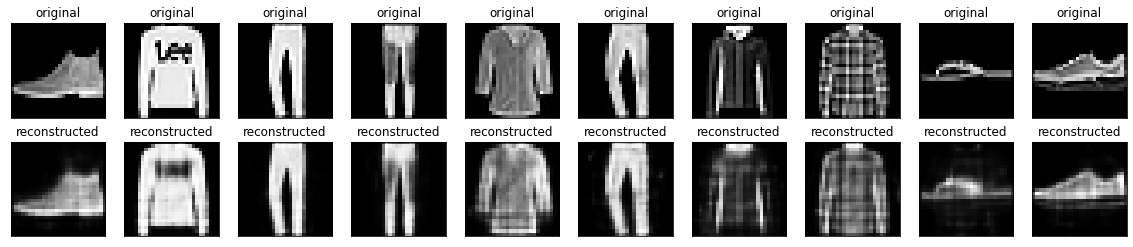

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


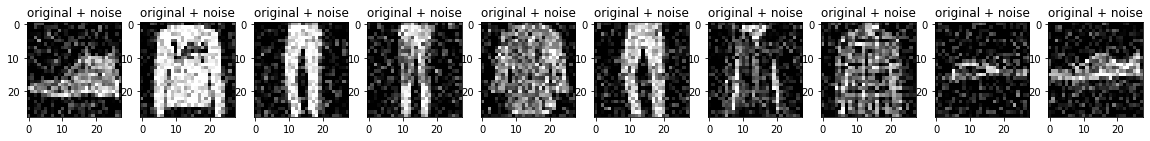

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 0.1629

   4/1875 [..............................] - ETA: 25s - loss: 0.1669

   7/1875 [..............................] - ETA: 27s - loss: 0.1667

  11/1875 [..............................] - ETA: 26s - loss: 0.1664

  15/1875 [..............................] - ETA: 25s - loss: 0.1659

  19/1875 [..............................] - ETA: 25s - loss: 0.1658

  23/1875 [..............................] - ETA: 25s - loss: 0.1651

  27/1875 [..............................] - ETA: 25s - loss: 0.1643

  31/1875 [..............................] - ETA: 25s - loss: 0.1627

  35/1875 [..............................] - ETA: 25s - loss: 0.1604

  39/1875 [..............................] - ETA: 25s - loss: 0.1586

  43/1875 [..............................] - ETA: 25s - loss: 0.1560

  47/1875 [..............................] - ETA: 24s - loss: 0.1529

  51/1875 [..............................] - ETA: 24s - loss: 0.1494

  55/1875 [..............................] - ETA: 24s - loss: 0.1457

  59/1875 [..............................] - ETA: 24s - loss: 0.1418

  63/1875 [>.............................] - ETA: 24s - loss: 0.1372

  67/1875 [>.............................] - ETA: 24s - loss: 0.1325

  71/1875 [>.............................] - ETA: 24s - loss: 0.1275

  75/1875 [>.............................] - ETA: 24s - loss: 0.1228

  79/1875 [>.............................] - ETA: 24s - loss: 0.1183

  83/1875 [>.............................] - ETA: 24s - loss: 0.1141

  87/1875 [>.............................] - ETA: 24s - loss: 0.1103

  91/1875 [>.............................] - ETA: 24s - loss: 0.1067

  95/1875 [>.............................] - ETA: 24s - loss: 0.1035

  99/1875 [>.............................] - ETA: 24s - loss: 0.1004

 103/1875 [>.............................] - ETA: 24s - loss: 0.0976

 107/1875 [>.............................] - ETA: 24s - loss: 0.0949

 111/1875 [>.............................] - ETA: 24s - loss: 0.0924

 115/1875 [>.............................] - ETA: 24s - loss: 0.0900

 119/1875 [>.............................] - ETA: 24s - loss: 0.0878

 123/1875 [>.............................] - ETA: 24s - loss: 0.0857

 127/1875 [=>............................] - ETA: 24s - loss: 0.0838

 131/1875 [=>............................] - ETA: 23s - loss: 0.0819

 135/1875 [=>............................] - ETA: 23s - loss: 0.0802

 139/1875 [=>............................] - ETA: 23s - loss: 0.0785

 143/1875 [=>............................] - ETA: 23s - loss: 0.0770

 147/1875 [=>............................] - ETA: 23s - loss: 0.0754

 151/1875 [=>............................] - ETA: 23s - loss: 0.0740

 155/1875 [=>............................] - ETA: 23s - loss: 0.0727

 159/1875 [=>............................] - ETA: 23s - loss: 0.0714

 163/1875 [=>............................] - ETA: 23s - loss: 0.0701

 167/1875 [=>............................] - ETA: 23s - loss: 0.0689

 171/1875 [=>............................] - ETA: 23s - loss: 0.0678

 175/1875 [=>............................] - ETA: 23s - loss: 0.0667

 179/1875 [=>............................] - ETA: 23s - loss: 0.0657

 183/1875 [=>............................] - ETA: 23s - loss: 0.0647

 188/1875 [==>...........................] - ETA: 23s - loss: 0.0635

 192/1875 [==>...........................] - ETA: 23s - loss: 0.0626

 196/1875 [==>...........................] - ETA: 23s - loss: 0.0618

 200/1875 [==>...........................] - ETA: 23s - loss: 0.0609

 204/1875 [==>...........................] - ETA: 23s - loss: 0.0601

 208/1875 [==>...........................] - ETA: 23s - loss: 0.0593

 212/1875 [==>...........................] - ETA: 23s - loss: 0.0585

 216/1875 [==>...........................] - ETA: 23s - loss: 0.0578

 220/1875 [==>...........................] - ETA: 23s - loss: 0.0571

 224/1875 [==>...........................] - ETA: 22s - loss: 0.0564

 228/1875 [==>...........................] - ETA: 22s - loss: 0.0558

 232/1875 [==>...........................] - ETA: 22s - loss: 0.0551

 236/1875 [==>...........................] - ETA: 22s - loss: 0.0545

 240/1875 [==>...........................] - ETA: 22s - loss: 0.0539

 244/1875 [==>...........................] - ETA: 22s - loss: 0.0533

 248/1875 [==>...........................] - ETA: 22s - loss: 0.0528

 252/1875 [===>..........................] - ETA: 22s - loss: 0.0522

 256/1875 [===>..........................] - ETA: 22s - loss: 0.0516

 260/1875 [===>..........................] - ETA: 22s - loss: 0.0511

 264/1875 [===>..........................] - ETA: 22s - loss: 0.0506

 268/1875 [===>..........................] - ETA: 22s - loss: 0.0501

 273/1875 [===>..........................] - ETA: 22s - loss: 0.0495

 277/1875 [===>..........................] - ETA: 22s - loss: 0.0491

 281/1875 [===>..........................] - ETA: 21s - loss: 0.0486

 285/1875 [===>..........................] - ETA: 21s - loss: 0.0481

 289/1875 [===>..........................] - ETA: 21s - loss: 0.0477

 293/1875 [===>..........................] - ETA: 21s - loss: 0.0473

 297/1875 [===>..........................] - ETA: 21s - loss: 0.0469

 301/1875 [===>..........................] - ETA: 21s - loss: 0.0465

 305/1875 [===>..........................] - ETA: 21s - loss: 0.0461

 310/1875 [===>..........................] - ETA: 21s - loss: 0.0456

 314/1875 [====>.........................] - ETA: 21s - loss: 0.0452

 318/1875 [====>.........................] - ETA: 21s - loss: 0.0449

 322/1875 [====>.........................] - ETA: 21s - loss: 0.0445

 327/1875 [====>.........................] - ETA: 21s - loss: 0.0441

 332/1875 [====>.........................] - ETA: 21s - loss: 0.0436

 336/1875 [====>.........................] - ETA: 21s - loss: 0.0433

 340/1875 [====>.........................] - ETA: 20s - loss: 0.0430

 345/1875 [====>.........................] - ETA: 20s - loss: 0.0426

 350/1875 [====>.........................] - ETA: 20s - loss: 0.0422

 355/1875 [====>.........................] - ETA: 20s - loss: 0.0418

 360/1875 [====>.........................] - ETA: 20s - loss: 0.0415

 365/1875 [====>.........................] - ETA: 20s - loss: 0.0411

 369/1875 [====>.........................] - ETA: 20s - loss: 0.0408

 373/1875 [====>.........................] - ETA: 20s - loss: 0.0406

 377/1875 [=====>........................] - ETA: 20s - loss: 0.0403

 382/1875 [=====>........................] - ETA: 20s - loss: 0.0400

 387/1875 [=====>........................] - ETA: 20s - loss: 0.0397

 391/1875 [=====>........................] - ETA: 20s - loss: 0.0394

 395/1875 [=====>........................] - ETA: 19s - loss: 0.0392

 400/1875 [=====>........................] - ETA: 19s - loss: 0.0389

 404/1875 [=====>........................] - ETA: 19s - loss: 0.0387

 409/1875 [=====>........................] - ETA: 19s - loss: 0.0384

 413/1875 [=====>........................] - ETA: 19s - loss: 0.0381

 418/1875 [=====>........................] - ETA: 19s - loss: 0.0379

 422/1875 [=====>........................] - ETA: 19s - loss: 0.0377

 426/1875 [=====>........................] - ETA: 19s - loss: 0.0374

 430/1875 [=====>........................] - ETA: 19s - loss: 0.0372

 435/1875 [=====>........................] - ETA: 19s - loss: 0.0370

 440/1875 [======>.......................] - ETA: 19s - loss: 0.0367

 445/1875 [======>.......................] - ETA: 19s - loss: 0.0365

 449/1875 [======>.......................] - ETA: 19s - loss: 0.0363

 453/1875 [======>.......................] - ETA: 19s - loss: 0.0361

 457/1875 [======>.......................] - ETA: 19s - loss: 0.0359

 461/1875 [======>.......................] - ETA: 18s - loss: 0.0357

 465/1875 [======>.......................] - ETA: 18s - loss: 0.0355

 469/1875 [======>.......................] - ETA: 18s - loss: 0.0354

 474/1875 [======>.......................] - ETA: 18s - loss: 0.0352

 479/1875 [======>.......................] - ETA: 18s - loss: 0.0349

 484/1875 [======>.......................] - ETA: 18s - loss: 0.0347

 488/1875 [======>.......................] - ETA: 18s - loss: 0.0346

 492/1875 [======>.......................] - ETA: 18s - loss: 0.0344

 497/1875 [======>.......................] - ETA: 18s - loss: 0.0342

 501/1875 [=======>......................] - ETA: 18s - loss: 0.0340

 505/1875 [=======>......................] - ETA: 18s - loss: 0.0339

 509/1875 [=======>......................] - ETA: 18s - loss: 0.0337

 513/1875 [=======>......................] - ETA: 18s - loss: 0.0336

 518/1875 [=======>......................] - ETA: 18s - loss: 0.0334

 522/1875 [=======>......................] - ETA: 18s - loss: 0.0332

 526/1875 [=======>......................] - ETA: 18s - loss: 0.0331

 530/1875 [=======>......................] - ETA: 18s - loss: 0.0330

 534/1875 [=======>......................] - ETA: 17s - loss: 0.0328

 538/1875 [=======>......................] - ETA: 17s - loss: 0.0327

 542/1875 [=======>......................] - ETA: 17s - loss: 0.0325

 546/1875 [=======>......................] - ETA: 17s - loss: 0.0324

 550/1875 [=======>......................] - ETA: 17s - loss: 0.0323

 554/1875 [=======>......................] - ETA: 17s - loss: 0.0321

 558/1875 [=======>......................] - ETA: 17s - loss: 0.0320

 562/1875 [=======>......................] - ETA: 17s - loss: 0.0319

 566/1875 [========>.....................] - ETA: 17s - loss: 0.0318

 570/1875 [========>.....................] - ETA: 17s - loss: 0.0316

 574/1875 [========>.....................] - ETA: 17s - loss: 0.0315

 578/1875 [========>.....................] - ETA: 17s - loss: 0.0314

 582/1875 [========>.....................] - ETA: 17s - loss: 0.0313

 586/1875 [========>.....................] - ETA: 17s - loss: 0.0311

 590/1875 [========>.....................] - ETA: 17s - loss: 0.0310

 594/1875 [========>.....................] - ETA: 17s - loss: 0.0309

 598/1875 [========>.....................] - ETA: 17s - loss: 0.0308

 602/1875 [========>.....................] - ETA: 17s - loss: 0.0307

 607/1875 [========>.....................] - ETA: 17s - loss: 0.0305

 612/1875 [========>.....................] - ETA: 16s - loss: 0.0304

 616/1875 [========>.....................] - ETA: 16s - loss: 0.0303

 620/1875 [========>.....................] - ETA: 16s - loss: 0.0302

 624/1875 [========>.....................] - ETA: 16s - loss: 0.0301

 629/1875 [=========>....................] - ETA: 16s - loss: 0.0300

 634/1875 [=========>....................] - ETA: 16s - loss: 0.0298

 639/1875 [=========>....................] - ETA: 16s - loss: 0.0297

 644/1875 [=========>....................] - ETA: 16s - loss: 0.0296

 649/1875 [=========>....................] - ETA: 16s - loss: 0.0295

 654/1875 [=========>....................] - ETA: 16s - loss: 0.0293

 658/1875 [=========>....................] - ETA: 16s - loss: 0.0292

 663/1875 [=========>....................] - ETA: 16s - loss: 0.0291

 668/1875 [=========>....................] - ETA: 16s - loss: 0.0290

 672/1875 [=========>....................] - ETA: 16s - loss: 0.0289

 676/1875 [=========>....................] - ETA: 15s - loss: 0.0288

 680/1875 [=========>....................] - ETA: 15s - loss: 0.0287

 684/1875 [=========>....................] - ETA: 15s - loss: 0.0286

 688/1875 [==========>...................] - ETA: 15s - loss: 0.0286

 692/1875 [==========>...................] - ETA: 15s - loss: 0.0285

 697/1875 [==========>...................] - ETA: 15s - loss: 0.0284

 701/1875 [==========>...................] - ETA: 15s - loss: 0.0283

 705/1875 [==========>...................] - ETA: 15s - loss: 0.0282

 709/1875 [==========>...................] - ETA: 15s - loss: 0.0281

 713/1875 [==========>...................] - ETA: 15s - loss: 0.0280

 717/1875 [==========>...................] - ETA: 15s - loss: 0.0280

 721/1875 [==========>...................] - ETA: 15s - loss: 0.0279

 725/1875 [==========>...................] - ETA: 15s - loss: 0.0278

 729/1875 [==========>...................] - ETA: 15s - loss: 0.0277

 734/1875 [==========>...................] - ETA: 15s - loss: 0.0276

 739/1875 [==========>...................] - ETA: 15s - loss: 0.0275

 744/1875 [==========>...................] - ETA: 15s - loss: 0.0274

 748/1875 [==========>...................] - ETA: 15s - loss: 0.0274

 752/1875 [===========>..................] - ETA: 14s - loss: 0.0273

 756/1875 [===========>..................] - ETA: 14s - loss: 0.0272

 760/1875 [===========>..................] - ETA: 14s - loss: 0.0271

 764/1875 [===========>..................] - ETA: 14s - loss: 0.0271

 768/1875 [===========>..................] - ETA: 14s - loss: 0.0270

 773/1875 [===========>..................] - ETA: 14s - loss: 0.0269

 777/1875 [===========>..................] - ETA: 14s - loss: 0.0268

 781/1875 [===========>..................] - ETA: 14s - loss: 0.0268

 786/1875 [===========>..................] - ETA: 14s - loss: 0.0267

 791/1875 [===========>..................] - ETA: 14s - loss: 0.0266

 796/1875 [===========>..................] - ETA: 14s - loss: 0.0265

 801/1875 [===========>..................] - ETA: 14s - loss: 0.0264

 806/1875 [===========>..................] - ETA: 14s - loss: 0.0263

 810/1875 [===========>..................] - ETA: 14s - loss: 0.0263

 814/1875 [============>.................] - ETA: 14s - loss: 0.0262

 818/1875 [============>.................] - ETA: 14s - loss: 0.0261

 823/1875 [============>.................] - ETA: 13s - loss: 0.0261

 827/1875 [============>.................] - ETA: 13s - loss: 0.0260

 831/1875 [============>.................] - ETA: 13s - loss: 0.0259

 836/1875 [============>.................] - ETA: 13s - loss: 0.0259

 840/1875 [============>.................] - ETA: 13s - loss: 0.0258

 844/1875 [============>.................] - ETA: 13s - loss: 0.0257

 848/1875 [============>.................] - ETA: 13s - loss: 0.0257

 852/1875 [============>.................] - ETA: 13s - loss: 0.0256

 856/1875 [============>.................] - ETA: 13s - loss: 0.0256

 860/1875 [============>.................] - ETA: 13s - loss: 0.0255

 864/1875 [============>.................] - ETA: 13s - loss: 0.0254

 869/1875 [============>.................] - ETA: 13s - loss: 0.0254

 873/1875 [============>.................] - ETA: 13s - loss: 0.0253

 877/1875 [=============>................] - ETA: 13s - loss: 0.0253

 882/1875 [=============>................] - ETA: 13s - loss: 0.0252

 886/1875 [=============>................] - ETA: 13s - loss: 0.0251

 890/1875 [=============>................] - ETA: 13s - loss: 0.0251

 894/1875 [=============>................] - ETA: 12s - loss: 0.0250

 899/1875 [=============>................] - ETA: 12s - loss: 0.0250

 903/1875 [=============>................] - ETA: 12s - loss: 0.0249

 907/1875 [=============>................] - ETA: 12s - loss: 0.0249

 912/1875 [=============>................] - ETA: 12s - loss: 0.0248

 916/1875 [=============>................] - ETA: 12s - loss: 0.0247

 920/1875 [=============>................] - ETA: 12s - loss: 0.0247

 924/1875 [=============>................] - ETA: 12s - loss: 0.0246

 928/1875 [=============>................] - ETA: 12s - loss: 0.0246

 932/1875 [=============>................] - ETA: 12s - loss: 0.0245

 936/1875 [=============>................] - ETA: 12s - loss: 0.0245

 940/1875 [==============>...............] - ETA: 12s - loss: 0.0244

 945/1875 [==============>...............] - ETA: 12s - loss: 0.0244

 950/1875 [==============>...............] - ETA: 12s - loss: 0.0243

 954/1875 [==============>...............] - ETA: 12s - loss: 0.0243

 959/1875 [==============>...............] - ETA: 12s - loss: 0.0242

 963/1875 [==============>...............] - ETA: 12s - loss: 0.0242

 968/1875 [==============>...............] - ETA: 11s - loss: 0.0241

 973/1875 [==============>...............] - ETA: 11s - loss: 0.0240

 977/1875 [==============>...............] - ETA: 11s - loss: 0.0240

 981/1875 [==============>...............] - ETA: 11s - loss: 0.0240

 985/1875 [==============>...............] - ETA: 11s - loss: 0.0239

 989/1875 [==============>...............] - ETA: 11s - loss: 0.0239

 993/1875 [==============>...............] - ETA: 11s - loss: 0.0238

 997/1875 [==============>...............] - ETA: 11s - loss: 0.0238

1001/1875 [===============>..............] - ETA: 11s - loss: 0.0237

1005/1875 [===============>..............] - ETA: 11s - loss: 0.0237

1009/1875 [===============>..............] - ETA: 11s - loss: 0.0236

1013/1875 [===============>..............] - ETA: 11s - loss: 0.0236

1017/1875 [===============>..............] - ETA: 11s - loss: 0.0235

1021/1875 [===============>..............] - ETA: 11s - loss: 0.0235

1025/1875 [===============>..............] - ETA: 11s - loss: 0.0235

1029/1875 [===============>..............] - ETA: 11s - loss: 0.0234

1033/1875 [===============>..............] - ETA: 11s - loss: 0.0234

1037/1875 [===============>..............] - ETA: 11s - loss: 0.0233

1041/1875 [===============>..............] - ETA: 11s - loss: 0.0233

1045/1875 [===============>..............] - ETA: 11s - loss: 0.0232

1049/1875 [===============>..............] - ETA: 10s - loss: 0.0232

1053/1875 [===============>..............] - ETA: 10s - loss: 0.0232

1057/1875 [===============>..............] - ETA: 10s - loss: 0.0231

1062/1875 [===============>..............] - ETA: 10s - loss: 0.0231

1067/1875 [================>.............] - ETA: 10s - loss: 0.0230

1071/1875 [================>.............] - ETA: 10s - loss: 0.0230

1075/1875 [================>.............] - ETA: 10s - loss: 0.0229

1080/1875 [================>.............] - ETA: 10s - loss: 0.0229

1084/1875 [================>.............] - ETA: 10s - loss: 0.0229

1088/1875 [================>.............] - ETA: 10s - loss: 0.0228

1092/1875 [================>.............] - ETA: 10s - loss: 0.0228

1097/1875 [================>.............] - ETA: 10s - loss: 0.0227

1102/1875 [================>.............] - ETA: 10s - loss: 0.0227

1106/1875 [================>.............] - ETA: 10s - loss: 0.0227

1110/1875 [================>.............] - ETA: 10s - loss: 0.0226

1114/1875 [================>.............] - ETA: 10s - loss: 0.0226

1118/1875 [================>.............] - ETA: 10s - loss: 0.0225

1122/1875 [================>.............] - ETA: 9s - loss: 0.0225 

1127/1875 [=================>............] - ETA: 9s - loss: 0.0225

1132/1875 [=================>............] - ETA: 9s - loss: 0.0224

1136/1875 [=================>............] - ETA: 9s - loss: 0.0224

1140/1875 [=================>............] - ETA: 9s - loss: 0.0223

1144/1875 [=================>............] - ETA: 9s - loss: 0.0223

1148/1875 [=================>............] - ETA: 9s - loss: 0.0223

1152/1875 [=================>............] - ETA: 9s - loss: 0.0222

1156/1875 [=================>............] - ETA: 9s - loss: 0.0222

1160/1875 [=================>............] - ETA: 9s - loss: 0.0222

1165/1875 [=================>............] - ETA: 9s - loss: 0.0221

1170/1875 [=================>............] - ETA: 9s - loss: 0.0221

1174/1875 [=================>............] - ETA: 9s - loss: 0.0221

1179/1875 [=================>............] - ETA: 9s - loss: 0.0220

1184/1875 [=================>............] - ETA: 9s - loss: 0.0220

1188/1875 [==================>...........] - ETA: 9s - loss: 0.0219

1192/1875 [==================>...........] - ETA: 9s - loss: 0.0219

1196/1875 [==================>...........] - ETA: 8s - loss: 0.0219

1201/1875 [==================>...........] - ETA: 8s - loss: 0.0218

1206/1875 [==================>...........] - ETA: 8s - loss: 0.0218

1210/1875 [==================>...........] - ETA: 8s - loss: 0.0218

1215/1875 [==================>...........] - ETA: 8s - loss: 0.0217

1220/1875 [==================>...........] - ETA: 8s - loss: 0.0217

1224/1875 [==================>...........] - ETA: 8s - loss: 0.0217

1229/1875 [==================>...........] - ETA: 8s - loss: 0.0216

1234/1875 [==================>...........] - ETA: 8s - loss: 0.0216

1239/1875 [==================>...........] - ETA: 8s - loss: 0.0216

1244/1875 [==================>...........] - ETA: 8s - loss: 0.0215

1249/1875 [==================>...........] - ETA: 8s - loss: 0.0215

1254/1875 [===================>..........] - ETA: 8s - loss: 0.0214

1258/1875 [===================>..........] - ETA: 8s - loss: 0.0214

1263/1875 [===================>..........] - ETA: 8s - loss: 0.0214

1268/1875 [===================>..........] - ETA: 7s - loss: 0.0213

1272/1875 [===================>..........] - ETA: 7s - loss: 0.0213

1276/1875 [===================>..........] - ETA: 7s - loss: 0.0213

1281/1875 [===================>..........] - ETA: 7s - loss: 0.0212

1285/1875 [===================>..........] - ETA: 7s - loss: 0.0212

1289/1875 [===================>..........] - ETA: 7s - loss: 0.0212

1293/1875 [===================>..........] - ETA: 7s - loss: 0.0212

1297/1875 [===================>..........] - ETA: 7s - loss: 0.0211

1301/1875 [===================>..........] - ETA: 7s - loss: 0.0211

1305/1875 [===================>..........] - ETA: 7s - loss: 0.0211

1310/1875 [===================>..........] - ETA: 7s - loss: 0.0210

1315/1875 [====================>.........] - ETA: 7s - loss: 0.0210

1320/1875 [====================>.........] - ETA: 7s - loss: 0.0210

1324/1875 [====================>.........] - ETA: 7s - loss: 0.0210

1328/1875 [====================>.........] - ETA: 7s - loss: 0.0209

1332/1875 [====================>.........] - ETA: 7s - loss: 0.0209

1337/1875 [====================>.........] - ETA: 7s - loss: 0.0209

1342/1875 [====================>.........] - ETA: 7s - loss: 0.0208

1347/1875 [====================>.........] - ETA: 6s - loss: 0.0208

1351/1875 [====================>.........] - ETA: 6s - loss: 0.0208

1355/1875 [====================>.........] - ETA: 6s - loss: 0.0207

1359/1875 [====================>.........] - ETA: 6s - loss: 0.0207

1364/1875 [====================>.........] - ETA: 6s - loss: 0.0207

1368/1875 [====================>.........] - ETA: 6s - loss: 0.0207

1373/1875 [====================>.........] - ETA: 6s - loss: 0.0206

1378/1875 [=====================>........] - ETA: 6s - loss: 0.0206

1382/1875 [=====================>........] - ETA: 6s - loss: 0.0206

1386/1875 [=====================>........] - ETA: 6s - loss: 0.0206

1390/1875 [=====================>........] - ETA: 6s - loss: 0.0205

1394/1875 [=====================>........] - ETA: 6s - loss: 0.0205

1399/1875 [=====================>........] - ETA: 6s - loss: 0.0205

1403/1875 [=====================>........] - ETA: 6s - loss: 0.0204

1407/1875 [=====================>........] - ETA: 6s - loss: 0.0204

1412/1875 [=====================>........] - ETA: 6s - loss: 0.0204

1416/1875 [=====================>........] - ETA: 6s - loss: 0.0204

1420/1875 [=====================>........] - ETA: 5s - loss: 0.0203

1424/1875 [=====================>........] - ETA: 5s - loss: 0.0203

1428/1875 [=====================>........] - ETA: 5s - loss: 0.0203

1432/1875 [=====================>........] - ETA: 5s - loss: 0.0203

1436/1875 [=====================>........] - ETA: 5s - loss: 0.0202

1440/1875 [======================>.......] - ETA: 5s - loss: 0.0202

1444/1875 [======================>.......] - ETA: 5s - loss: 0.0202

1449/1875 [======================>.......] - ETA: 5s - loss: 0.0202

1453/1875 [======================>.......] - ETA: 5s - loss: 0.0202

1457/1875 [======================>.......] - ETA: 5s - loss: 0.0201

1462/1875 [======================>.......] - ETA: 5s - loss: 0.0201

1466/1875 [======================>.......] - ETA: 5s - loss: 0.0201

1470/1875 [======================>.......] - ETA: 5s - loss: 0.0201

1474/1875 [======================>.......] - ETA: 5s - loss: 0.0200

1478/1875 [======================>.......] - ETA: 5s - loss: 0.0200

1482/1875 [======================>.......] - ETA: 5s - loss: 0.0200

1486/1875 [======================>.......] - ETA: 5s - loss: 0.0200

1490/1875 [======================>.......] - ETA: 5s - loss: 0.0199

1494/1875 [======================>.......] - ETA: 5s - loss: 0.0199

1498/1875 [======================>.......] - ETA: 4s - loss: 0.0199

1503/1875 [=======================>......] - ETA: 4s - loss: 0.0199

1508/1875 [=======================>......] - ETA: 4s - loss: 0.0198

1513/1875 [=======================>......] - ETA: 4s - loss: 0.0198

1518/1875 [=======================>......] - ETA: 4s - loss: 0.0198

1522/1875 [=======================>......] - ETA: 4s - loss: 0.0198

1527/1875 [=======================>......] - ETA: 4s - loss: 0.0197

1532/1875 [=======================>......] - ETA: 4s - loss: 0.0197

1536/1875 [=======================>......] - ETA: 4s - loss: 0.0197

1540/1875 [=======================>......] - ETA: 4s - loss: 0.0197

1544/1875 [=======================>......] - ETA: 4s - loss: 0.0197

1549/1875 [=======================>......] - ETA: 4s - loss: 0.0196

1554/1875 [=======================>......] - ETA: 4s - loss: 0.0196

1558/1875 [=======================>......] - ETA: 4s - loss: 0.0196

1562/1875 [=======================>......] - ETA: 4s - loss: 0.0196

1567/1875 [========================>.....] - ETA: 4s - loss: 0.0195

1572/1875 [========================>.....] - ETA: 3s - loss: 0.0195

1576/1875 [========================>.....] - ETA: 3s - loss: 0.0195

1581/1875 [========================>.....] - ETA: 3s - loss: 0.0195

1585/1875 [========================>.....] - ETA: 3s - loss: 0.0195

1590/1875 [========================>.....] - ETA: 3s - loss: 0.0194

1595/1875 [========================>.....] - ETA: 3s - loss: 0.0194

1599/1875 [========================>.....] - ETA: 3s - loss: 0.0194

1603/1875 [========================>.....] - ETA: 3s - loss: 0.0194

1607/1875 [========================>.....] - ETA: 3s - loss: 0.0193

1611/1875 [========================>.....] - ETA: 3s - loss: 0.0193

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0193

1621/1875 [========================>.....] - ETA: 3s - loss: 0.0193

1625/1875 [=========================>....] - ETA: 3s - loss: 0.0193

1630/1875 [=========================>....] - ETA: 3s - loss: 0.0192

1634/1875 [=========================>....] - ETA: 3s - loss: 0.0192

1639/1875 [=========================>....] - ETA: 3s - loss: 0.0192

1643/1875 [=========================>....] - ETA: 3s - loss: 0.0192

1647/1875 [=========================>....] - ETA: 2s - loss: 0.0192

1652/1875 [=========================>....] - ETA: 2s - loss: 0.0191

1657/1875 [=========================>....] - ETA: 2s - loss: 0.0191

1662/1875 [=========================>....] - ETA: 2s - loss: 0.0191

1666/1875 [=========================>....] - ETA: 2s - loss: 0.0191

1670/1875 [=========================>....] - ETA: 2s - loss: 0.0191

1674/1875 [=========================>....] - ETA: 2s - loss: 0.0190

1679/1875 [=========================>....] - ETA: 2s - loss: 0.0190

1684/1875 [=========================>....] - ETA: 2s - loss: 0.0190

1688/1875 [==========================>...] - ETA: 2s - loss: 0.0190

1692/1875 [==========================>...] - ETA: 2s - loss: 0.0190

1697/1875 [==========================>...] - ETA: 2s - loss: 0.0189

1701/1875 [==========================>...] - ETA: 2s - loss: 0.0189

1705/1875 [==========================>...] - ETA: 2s - loss: 0.0189

1710/1875 [==========================>...] - ETA: 2s - loss: 0.0189

1714/1875 [==========================>...] - ETA: 2s - loss: 0.0189

1718/1875 [==========================>...] - ETA: 2s - loss: 0.0188

1722/1875 [==========================>...] - ETA: 2s - loss: 0.0188

1726/1875 [==========================>...] - ETA: 1s - loss: 0.0188

1731/1875 [==========================>...] - ETA: 1s - loss: 0.0188

1735/1875 [==========================>...] - ETA: 1s - loss: 0.0188

1739/1875 [==========================>...] - ETA: 1s - loss: 0.0187

1743/1875 [==========================>...] - ETA: 1s - loss: 0.0187

1747/1875 [==========================>...] - ETA: 1s - loss: 0.0187

1751/1875 [===========================>..] - ETA: 1s - loss: 0.0187

1755/1875 [===========================>..] - ETA: 1s - loss: 0.0187

1759/1875 [===========================>..] - ETA: 1s - loss: 0.0187

1764/1875 [===========================>..] - ETA: 1s - loss: 0.0186

1769/1875 [===========================>..] - ETA: 1s - loss: 0.0186

1773/1875 [===========================>..] - ETA: 1s - loss: 0.0186

1778/1875 [===========================>..] - ETA: 1s - loss: 0.0186

1782/1875 [===========================>..] - ETA: 1s - loss: 0.0186

1786/1875 [===========================>..] - ETA: 1s - loss: 0.0185

1790/1875 [===========================>..] - ETA: 1s - loss: 0.0185

1794/1875 [===========================>..] - ETA: 1s - loss: 0.0185

1798/1875 [===========================>..] - ETA: 1s - loss: 0.0185

1802/1875 [===========================>..] - ETA: 0s - loss: 0.0185

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0185

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0184

1814/1875 [============================>.] - ETA: 0s - loss: 0.0184

1818/1875 [============================>.] - ETA: 0s - loss: 0.0184

1823/1875 [============================>.] - ETA: 0s - loss: 0.0184

1827/1875 [============================>.] - ETA: 0s - loss: 0.0184

1832/1875 [============================>.] - ETA: 0s - loss: 0.0184

1836/1875 [============================>.] - ETA: 0s - loss: 0.0183

1840/1875 [============================>.] - ETA: 0s - loss: 0.0183

1844/1875 [============================>.] - ETA: 0s - loss: 0.0183

1848/1875 [============================>.] - ETA: 0s - loss: 0.0183

1852/1875 [============================>.] - ETA: 0s - loss: 0.0183

1856/1875 [============================>.] - ETA: 0s - loss: 0.0183

1860/1875 [============================>.] - ETA: 0s - loss: 0.0183

1865/1875 [============================>.] - ETA: 0s - loss: 0.0182

1869/1875 [============================>.] - ETA: 0s - loss: 0.0182

1873/1875 [============================>.] - ETA: 0s - loss: 0.0182

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0182 - val_loss: 0.0112


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0119

   5/1875 [..............................] - ETA: 19s - loss: 0.0110

   9/1875 [..............................] - ETA: 22s - loss: 0.0112

  13/1875 [..............................] - ETA: 22s - loss: 0.0111

  18/1875 [..............................] - ETA: 22s - loss: 0.0112

  22/1875 [..............................] - ETA: 22s - loss: 0.0112

  27/1875 [..............................] - ETA: 22s - loss: 0.0113

  31/1875 [..............................] - ETA: 23s - loss: 0.0112

  35/1875 [..............................] - ETA: 23s - loss: 0.0112

  40/1875 [..............................] - ETA: 23s - loss: 0.0111

  44/1875 [..............................] - ETA: 23s - loss: 0.0111

  48/1875 [..............................] - ETA: 23s - loss: 0.0112

  52/1875 [..............................] - ETA: 23s - loss: 0.0111

  56/1875 [..............................] - ETA: 23s - loss: 0.0112

  61/1875 [..............................] - ETA: 23s - loss: 0.0111

  65/1875 [>.............................] - ETA: 23s - loss: 0.0111

  69/1875 [>.............................] - ETA: 23s - loss: 0.0111

  73/1875 [>.............................] - ETA: 23s - loss: 0.0111

  78/1875 [>.............................] - ETA: 22s - loss: 0.0111

  83/1875 [>.............................] - ETA: 22s - loss: 0.0111

  88/1875 [>.............................] - ETA: 22s - loss: 0.0110

  92/1875 [>.............................] - ETA: 22s - loss: 0.0111

  96/1875 [>.............................] - ETA: 22s - loss: 0.0111

 101/1875 [>.............................] - ETA: 22s - loss: 0.0111

 106/1875 [>.............................] - ETA: 22s - loss: 0.0111

 110/1875 [>.............................] - ETA: 22s - loss: 0.0111

 114/1875 [>.............................] - ETA: 22s - loss: 0.0111

 118/1875 [>.............................] - ETA: 22s - loss: 0.0111

 123/1875 [>.............................] - ETA: 22s - loss: 0.0111

 127/1875 [=>............................] - ETA: 22s - loss: 0.0111

 131/1875 [=>............................] - ETA: 22s - loss: 0.0111

 135/1875 [=>............................] - ETA: 22s - loss: 0.0111

 139/1875 [=>............................] - ETA: 22s - loss: 0.0111

 143/1875 [=>............................] - ETA: 22s - loss: 0.0111

 147/1875 [=>............................] - ETA: 22s - loss: 0.0111

 152/1875 [=>............................] - ETA: 22s - loss: 0.0111

 157/1875 [=>............................] - ETA: 22s - loss: 0.0111

 161/1875 [=>............................] - ETA: 22s - loss: 0.0111

 165/1875 [=>............................] - ETA: 22s - loss: 0.0111

 170/1875 [=>............................] - ETA: 21s - loss: 0.0111

 174/1875 [=>............................] - ETA: 21s - loss: 0.0111

 178/1875 [=>............................] - ETA: 21s - loss: 0.0110

 182/1875 [=>............................] - ETA: 22s - loss: 0.0110

 186/1875 [=>............................] - ETA: 21s - loss: 0.0110

 190/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 194/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 198/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 202/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 206/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 210/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 215/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 219/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 223/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 227/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 231/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 236/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 240/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 244/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 249/1875 [==>...........................] - ETA: 21s - loss: 0.0110

 253/1875 [===>..........................] - ETA: 21s - loss: 0.0110

 258/1875 [===>..........................] - ETA: 21s - loss: 0.0110

 262/1875 [===>..........................] - ETA: 21s - loss: 0.0110

 266/1875 [===>..........................] - ETA: 21s - loss: 0.0110

 270/1875 [===>..........................] - ETA: 21s - loss: 0.0110

 274/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 278/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 282/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 286/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 291/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 296/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 300/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 305/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 310/1875 [===>..........................] - ETA: 20s - loss: 0.0109

 314/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 318/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 322/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 327/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 331/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 335/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 339/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 343/1875 [====>.........................] - ETA: 20s - loss: 0.0109

 348/1875 [====>.........................] - ETA: 19s - loss: 0.0109

 353/1875 [====>.........................] - ETA: 19s - loss: 0.0109

 357/1875 [====>.........................] - ETA: 19s - loss: 0.0109

 361/1875 [====>.........................] - ETA: 19s - loss: 0.0109

 365/1875 [====>.........................] - ETA: 19s - loss: 0.0109

 369/1875 [====>.........................] - ETA: 19s - loss: 0.0108

 373/1875 [====>.........................] - ETA: 19s - loss: 0.0108

 378/1875 [=====>........................] - ETA: 19s - loss: 0.0109

 383/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 387/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 391/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 395/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 400/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 405/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 409/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 413/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 417/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 421/1875 [=====>........................] - ETA: 19s - loss: 0.0108

 425/1875 [=====>........................] - ETA: 18s - loss: 0.0108

 429/1875 [=====>........................] - ETA: 18s - loss: 0.0108

 433/1875 [=====>........................] - ETA: 18s - loss: 0.0108

 437/1875 [=====>........................] - ETA: 18s - loss: 0.0108

 441/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 445/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 450/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 454/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 458/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 462/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 466/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 470/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 474/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 479/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 483/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 487/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 491/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 495/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 499/1875 [======>.......................] - ETA: 18s - loss: 0.0108

 504/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 508/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 512/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 516/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 520/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 524/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 529/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 533/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 537/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 541/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 545/1875 [=======>......................] - ETA: 17s - loss: 0.0108

 550/1875 [=======>......................] - ETA: 17s - loss: 0.0107

 554/1875 [=======>......................] - ETA: 17s - loss: 0.0107

 559/1875 [=======>......................] - ETA: 17s - loss: 0.0107

 563/1875 [========>.....................] - ETA: 17s - loss: 0.0107

 567/1875 [========>.....................] - ETA: 17s - loss: 0.0107

 571/1875 [========>.....................] - ETA: 17s - loss: 0.0107

 576/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 581/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 585/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 589/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 594/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 599/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 604/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 608/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 613/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 618/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 623/1875 [========>.....................] - ETA: 16s - loss: 0.0107

 627/1875 [=========>....................] - ETA: 16s - loss: 0.0107

 631/1875 [=========>....................] - ETA: 16s - loss: 0.0107

 635/1875 [=========>....................] - ETA: 16s - loss: 0.0107

 640/1875 [=========>....................] - ETA: 16s - loss: 0.0107

 645/1875 [=========>....................] - ETA: 16s - loss: 0.0107

 649/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 653/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 657/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 661/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 665/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 670/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 674/1875 [=========>....................] - ETA: 15s - loss: 0.0107

 679/1875 [=========>....................] - ETA: 15s - loss: 0.0106

 683/1875 [=========>....................] - ETA: 15s - loss: 0.0106

 687/1875 [=========>....................] - ETA: 15s - loss: 0.0106

 691/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 695/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 699/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 703/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 707/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 711/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 715/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 719/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 724/1875 [==========>...................] - ETA: 15s - loss: 0.0106

 728/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 732/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 736/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 740/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 744/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 749/1875 [==========>...................] - ETA: 14s - loss: 0.0106

 754/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 758/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 762/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 766/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 771/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 776/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 780/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 785/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 789/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 793/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 797/1875 [===========>..................] - ETA: 14s - loss: 0.0106

 801/1875 [===========>..................] - ETA: 13s - loss: 0.0106

 805/1875 [===========>..................] - ETA: 13s - loss: 0.0106

 809/1875 [===========>..................] - ETA: 13s - loss: 0.0106

 813/1875 [============>.................] - ETA: 13s - loss: 0.0106

 817/1875 [============>.................] - ETA: 13s - loss: 0.0106

 821/1875 [============>.................] - ETA: 13s - loss: 0.0106

 825/1875 [============>.................] - ETA: 13s - loss: 0.0106

 830/1875 [============>.................] - ETA: 13s - loss: 0.0106

 835/1875 [============>.................] - ETA: 13s - loss: 0.0105

 839/1875 [============>.................] - ETA: 13s - loss: 0.0105

 843/1875 [============>.................] - ETA: 13s - loss: 0.0105

 848/1875 [============>.................] - ETA: 13s - loss: 0.0105

 852/1875 [============>.................] - ETA: 13s - loss: 0.0105

 856/1875 [============>.................] - ETA: 13s - loss: 0.0105

 860/1875 [============>.................] - ETA: 13s - loss: 0.0105

 865/1875 [============>.................] - ETA: 13s - loss: 0.0105

 869/1875 [============>.................] - ETA: 13s - loss: 0.0105

 873/1875 [============>.................] - ETA: 13s - loss: 0.0105

 878/1875 [=============>................] - ETA: 12s - loss: 0.0105

 882/1875 [=============>................] - ETA: 12s - loss: 0.0105

 886/1875 [=============>................] - ETA: 12s - loss: 0.0105

 890/1875 [=============>................] - ETA: 12s - loss: 0.0105

 895/1875 [=============>................] - ETA: 12s - loss: 0.0105

 899/1875 [=============>................] - ETA: 12s - loss: 0.0105

 903/1875 [=============>................] - ETA: 12s - loss: 0.0105

 908/1875 [=============>................] - ETA: 12s - loss: 0.0105

 912/1875 [=============>................] - ETA: 12s - loss: 0.0105

 916/1875 [=============>................] - ETA: 12s - loss: 0.0105

 920/1875 [=============>................] - ETA: 12s - loss: 0.0105

 925/1875 [=============>................] - ETA: 12s - loss: 0.0105

 930/1875 [=============>................] - ETA: 12s - loss: 0.0105

 934/1875 [=============>................] - ETA: 12s - loss: 0.0105

 938/1875 [==============>...............] - ETA: 12s - loss: 0.0105

 943/1875 [==============>...............] - ETA: 12s - loss: 0.0105

 947/1875 [==============>...............] - ETA: 12s - loss: 0.0105

 952/1875 [==============>...............] - ETA: 12s - loss: 0.0105

 956/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 961/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 966/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 971/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 976/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 980/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 985/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 990/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 995/1875 [==============>...............] - ETA: 11s - loss: 0.0105

 999/1875 [==============>...............] - ETA: 11s - loss: 0.0105

1003/1875 [===============>..............] - ETA: 11s - loss: 0.0105

1007/1875 [===============>..............] - ETA: 11s - loss: 0.0104

1011/1875 [===============>..............] - ETA: 11s - loss: 0.0104

1016/1875 [===============>..............] - ETA: 11s - loss: 0.0104

1020/1875 [===============>..............] - ETA: 11s - loss: 0.0104

1025/1875 [===============>..............] - ETA: 11s - loss: 0.0104

1030/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1035/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1040/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1045/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1050/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1055/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1060/1875 [===============>..............] - ETA: 10s - loss: 0.0104

1064/1875 [================>.............] - ETA: 10s - loss: 0.0104

1068/1875 [================>.............] - ETA: 10s - loss: 0.0104

1072/1875 [================>.............] - ETA: 10s - loss: 0.0104

1076/1875 [================>.............] - ETA: 10s - loss: 0.0104

1081/1875 [================>.............] - ETA: 10s - loss: 0.0104

1085/1875 [================>.............] - ETA: 10s - loss: 0.0104

1089/1875 [================>.............] - ETA: 10s - loss: 0.0104

1093/1875 [================>.............] - ETA: 10s - loss: 0.0104

1097/1875 [================>.............] - ETA: 10s - loss: 0.0104

1101/1875 [================>.............] - ETA: 10s - loss: 0.0104

1106/1875 [================>.............] - ETA: 9s - loss: 0.0104 

1110/1875 [================>.............] - ETA: 9s - loss: 0.0104

1114/1875 [================>.............] - ETA: 9s - loss: 0.0104

1118/1875 [================>.............] - ETA: 9s - loss: 0.0104

1122/1875 [================>.............] - ETA: 9s - loss: 0.0104

1126/1875 [=================>............] - ETA: 9s - loss: 0.0104

1130/1875 [=================>............] - ETA: 9s - loss: 0.0104

1134/1875 [=================>............] - ETA: 9s - loss: 0.0104

1138/1875 [=================>............] - ETA: 9s - loss: 0.0104

1142/1875 [=================>............] - ETA: 9s - loss: 0.0104

1147/1875 [=================>............] - ETA: 9s - loss: 0.0104

1151/1875 [=================>............] - ETA: 9s - loss: 0.0104

1155/1875 [=================>............] - ETA: 9s - loss: 0.0104

1160/1875 [=================>............] - ETA: 9s - loss: 0.0104

1164/1875 [=================>............] - ETA: 9s - loss: 0.0104

1168/1875 [=================>............] - ETA: 9s - loss: 0.0104

1173/1875 [=================>............] - ETA: 9s - loss: 0.0104

1177/1875 [=================>............] - ETA: 9s - loss: 0.0103

1181/1875 [=================>............] - ETA: 8s - loss: 0.0103

1185/1875 [=================>............] - ETA: 8s - loss: 0.0103

1189/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1193/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1197/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1201/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1205/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1209/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1213/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1218/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1223/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1228/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1232/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1236/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1240/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1244/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1249/1875 [==================>...........] - ETA: 8s - loss: 0.0103

1254/1875 [===================>..........] - ETA: 8s - loss: 0.0103

1259/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1263/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1268/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1273/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1278/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1282/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1286/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1291/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1295/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1300/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1304/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1308/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1312/1875 [===================>..........] - ETA: 7s - loss: 0.0103

1317/1875 [====================>.........] - ETA: 7s - loss: 0.0103

1322/1875 [====================>.........] - ETA: 7s - loss: 0.0103

1327/1875 [====================>.........] - ETA: 7s - loss: 0.0103

1332/1875 [====================>.........] - ETA: 7s - loss: 0.0103

1337/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1342/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1346/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1351/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1355/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1359/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1363/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1368/1875 [====================>.........] - ETA: 6s - loss: 0.0103

1373/1875 [====================>.........] - ETA: 6s - loss: 0.0102

1378/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1383/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1388/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1392/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1396/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1400/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1404/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1408/1875 [=====================>........] - ETA: 6s - loss: 0.0102

1412/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1417/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1421/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1425/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1430/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1434/1875 [=====================>........] - ETA: 5s - loss: 0.0102

1438/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1442/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1446/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1450/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1454/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1459/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1464/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1469/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1473/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1477/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1482/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1487/1875 [======================>.......] - ETA: 5s - loss: 0.0102

1491/1875 [======================>.......] - ETA: 4s - loss: 0.0102

1495/1875 [======================>.......] - ETA: 4s - loss: 0.0102

1500/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1505/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1509/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1513/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1517/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1522/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1526/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1530/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1534/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1539/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1543/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1547/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1551/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1555/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1559/1875 [=======================>......] - ETA: 4s - loss: 0.0102

1564/1875 [========================>.....] - ETA: 4s - loss: 0.0102

1569/1875 [========================>.....] - ETA: 3s - loss: 0.0102

1574/1875 [========================>.....] - ETA: 3s - loss: 0.0102

1579/1875 [========================>.....] - ETA: 3s - loss: 0.0102

1583/1875 [========================>.....] - ETA: 3s - loss: 0.0102

1587/1875 [========================>.....] - ETA: 3s - loss: 0.0102

1591/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1595/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1600/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1604/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1608/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1612/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1621/1875 [========================>.....] - ETA: 3s - loss: 0.0101

1626/1875 [=========================>....] - ETA: 3s - loss: 0.0101

1630/1875 [=========================>....] - ETA: 3s - loss: 0.0101

1635/1875 [=========================>....] - ETA: 3s - loss: 0.0101

1639/1875 [=========================>....] - ETA: 3s - loss: 0.0101

1643/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1647/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1652/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1656/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1660/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1664/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1668/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1672/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1676/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1680/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1685/1875 [=========================>....] - ETA: 2s - loss: 0.0101

1689/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1693/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1697/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1702/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1711/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1715/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1719/1875 [==========================>...] - ETA: 2s - loss: 0.0101

1724/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1729/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1733/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1737/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1742/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1747/1875 [==========================>...] - ETA: 1s - loss: 0.0101

1752/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1756/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1760/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1764/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1768/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1772/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1776/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1780/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1785/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1789/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1794/1875 [===========================>..] - ETA: 1s - loss: 0.0101

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1816/1875 [============================>.] - ETA: 0s - loss: 0.0100

1821/1875 [============================>.] - ETA: 0s - loss: 0.0100

1825/1875 [============================>.] - ETA: 0s - loss: 0.0100

1830/1875 [============================>.] - ETA: 0s - loss: 0.0100

1835/1875 [============================>.] - ETA: 0s - loss: 0.0100

1839/1875 [============================>.] - ETA: 0s - loss: 0.0100

1843/1875 [============================>.] - ETA: 0s - loss: 0.0100

1848/1875 [============================>.] - ETA: 0s - loss: 0.0100

1852/1875 [============================>.] - ETA: 0s - loss: 0.0100

1856/1875 [============================>.] - ETA: 0s - loss: 0.0100

1860/1875 [============================>.] - ETA: 0s - loss: 0.0100

1864/1875 [============================>.] - ETA: 0s - loss: 0.0100

1869/1875 [============================>.] - ETA: 0s - loss: 0.0100

1873/1875 [============================>.] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - 25s 14ms/step - loss: 0.0100 - val_loss: 0.0093


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0085

   5/1875 [..............................] - ETA: 19s - loss: 0.0091

  10/1875 [..............................] - ETA: 20s - loss: 0.0091

  15/1875 [..............................] - ETA: 21s - loss: 0.0091

  20/1875 [..............................] - ETA: 21s - loss: 0.0091

  24/1875 [..............................] - ETA: 21s - loss: 0.0091

  29/1875 [..............................] - ETA: 21s - loss: 0.0091

  33/1875 [..............................] - ETA: 21s - loss: 0.0092

  38/1875 [..............................] - ETA: 21s - loss: 0.0092

  43/1875 [..............................] - ETA: 21s - loss: 0.0092

  47/1875 [..............................] - ETA: 21s - loss: 0.0092

  52/1875 [..............................] - ETA: 21s - loss: 0.0093

  57/1875 [..............................] - ETA: 21s - loss: 0.0093

  62/1875 [..............................] - ETA: 21s - loss: 0.0093

  66/1875 [>.............................] - ETA: 21s - loss: 0.0093

  71/1875 [>.............................] - ETA: 21s - loss: 0.0093

  76/1875 [>.............................] - ETA: 21s - loss: 0.0092

  81/1875 [>.............................] - ETA: 21s - loss: 0.0092

  86/1875 [>.............................] - ETA: 21s - loss: 0.0093

  91/1875 [>.............................] - ETA: 21s - loss: 0.0093

  95/1875 [>.............................] - ETA: 21s - loss: 0.0092

  99/1875 [>.............................] - ETA: 21s - loss: 0.0093

 104/1875 [>.............................] - ETA: 21s - loss: 0.0092

 108/1875 [>.............................] - ETA: 21s - loss: 0.0092

 113/1875 [>.............................] - ETA: 21s - loss: 0.0092

 117/1875 [>.............................] - ETA: 21s - loss: 0.0092

 121/1875 [>.............................] - ETA: 21s - loss: 0.0092

 126/1875 [=>............................] - ETA: 21s - loss: 0.0092

 130/1875 [=>............................] - ETA: 21s - loss: 0.0092

 135/1875 [=>............................] - ETA: 21s - loss: 0.0092

 140/1875 [=>............................] - ETA: 21s - loss: 0.0092

 145/1875 [=>............................] - ETA: 21s - loss: 0.0092

 150/1875 [=>............................] - ETA: 21s - loss: 0.0092

 154/1875 [=>............................] - ETA: 21s - loss: 0.0092

 159/1875 [=>............................] - ETA: 21s - loss: 0.0092

 164/1875 [=>............................] - ETA: 21s - loss: 0.0092

 169/1875 [=>............................] - ETA: 20s - loss: 0.0092

 173/1875 [=>............................] - ETA: 20s - loss: 0.0092

 178/1875 [=>............................] - ETA: 20s - loss: 0.0092

 182/1875 [=>............................] - ETA: 20s - loss: 0.0092

 186/1875 [=>............................] - ETA: 20s - loss: 0.0092

 190/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 194/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 198/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 203/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 208/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 213/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 217/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 222/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 227/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 231/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 235/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 239/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 243/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 248/1875 [==>...........................] - ETA: 20s - loss: 0.0092

 252/1875 [===>..........................] - ETA: 20s - loss: 0.0092

 256/1875 [===>..........................] - ETA: 20s - loss: 0.0092

 260/1875 [===>..........................] - ETA: 20s - loss: 0.0092

 265/1875 [===>..........................] - ETA: 20s - loss: 0.0092

 270/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 274/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 278/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 283/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 287/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 291/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 295/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 299/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 304/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 309/1875 [===>..........................] - ETA: 19s - loss: 0.0092

 313/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 317/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 322/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 326/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 330/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 334/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 338/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 342/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 347/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 352/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 357/1875 [====>.........................] - ETA: 19s - loss: 0.0092

 362/1875 [====>.........................] - ETA: 18s - loss: 0.0092

 367/1875 [====>.........................] - ETA: 18s - loss: 0.0092

 371/1875 [====>.........................] - ETA: 18s - loss: 0.0092

 376/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 381/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 385/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 390/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 395/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 400/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 404/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 409/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 413/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 418/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 423/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 428/1875 [=====>........................] - ETA: 18s - loss: 0.0092

 432/1875 [=====>........................] - ETA: 17s - loss: 0.0092

 436/1875 [=====>........................] - ETA: 17s - loss: 0.0092

 440/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 445/1875 [======>.......................] - ETA: 17s - loss: 0.0092

 450/1875 [======>.......................] - ETA: 17s - loss: 0.0092

 455/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 460/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 464/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 468/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 473/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 478/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 483/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 487/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 491/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 495/1875 [======>.......................] - ETA: 17s - loss: 0.0091

 500/1875 [=======>......................] - ETA: 17s - loss: 0.0091

 505/1875 [=======>......................] - ETA: 17s - loss: 0.0091

 509/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 514/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 518/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 523/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 528/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 533/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 537/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 541/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 545/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 549/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 553/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 558/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 562/1875 [=======>......................] - ETA: 16s - loss: 0.0091

 566/1875 [========>.....................] - ETA: 16s - loss: 0.0091

 571/1875 [========>.....................] - ETA: 16s - loss: 0.0091

 576/1875 [========>.....................] - ETA: 16s - loss: 0.0091

 580/1875 [========>.....................] - ETA: 16s - loss: 0.0091

 585/1875 [========>.....................] - ETA: 16s - loss: 0.0091

 590/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 595/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 600/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 605/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 609/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 613/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 618/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 623/1875 [========>.....................] - ETA: 15s - loss: 0.0091

 628/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 633/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 638/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 643/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 648/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 653/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 657/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 662/1875 [=========>....................] - ETA: 15s - loss: 0.0091

 667/1875 [=========>....................] - ETA: 14s - loss: 0.0091

 672/1875 [=========>....................] - ETA: 14s - loss: 0.0091

 677/1875 [=========>....................] - ETA: 14s - loss: 0.0091

 682/1875 [=========>....................] - ETA: 14s - loss: 0.0091

 687/1875 [=========>....................] - ETA: 14s - loss: 0.0091

 691/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 696/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 700/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 705/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 709/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 714/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 718/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 723/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 728/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 732/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 737/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 742/1875 [==========>...................] - ETA: 14s - loss: 0.0091

 747/1875 [==========>...................] - ETA: 13s - loss: 0.0091

 751/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 755/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 759/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 764/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 769/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 774/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 779/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 784/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 788/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 792/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 796/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 800/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 805/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 810/1875 [===========>..................] - ETA: 13s - loss: 0.0091

 814/1875 [============>.................] - ETA: 13s - loss: 0.0091

 818/1875 [============>.................] - ETA: 13s - loss: 0.0091

 823/1875 [============>.................] - ETA: 13s - loss: 0.0091

 827/1875 [============>.................] - ETA: 13s - loss: 0.0091

 832/1875 [============>.................] - ETA: 12s - loss: 0.0091

 837/1875 [============>.................] - ETA: 12s - loss: 0.0091

 841/1875 [============>.................] - ETA: 12s - loss: 0.0091

 845/1875 [============>.................] - ETA: 12s - loss: 0.0091

 849/1875 [============>.................] - ETA: 12s - loss: 0.0091

 853/1875 [============>.................] - ETA: 12s - loss: 0.0091

 857/1875 [============>.................] - ETA: 12s - loss: 0.0091

 862/1875 [============>.................] - ETA: 12s - loss: 0.0091

 867/1875 [============>.................] - ETA: 12s - loss: 0.0091

 872/1875 [============>.................] - ETA: 12s - loss: 0.0091

 877/1875 [=============>................] - ETA: 12s - loss: 0.0091

 882/1875 [=============>................] - ETA: 12s - loss: 0.0091

 886/1875 [=============>................] - ETA: 12s - loss: 0.0091

 890/1875 [=============>................] - ETA: 12s - loss: 0.0091

 895/1875 [=============>................] - ETA: 12s - loss: 0.0091

 900/1875 [=============>................] - ETA: 12s - loss: 0.0091

 904/1875 [=============>................] - ETA: 12s - loss: 0.0091

 908/1875 [=============>................] - ETA: 12s - loss: 0.0091

 912/1875 [=============>................] - ETA: 11s - loss: 0.0091

 917/1875 [=============>................] - ETA: 11s - loss: 0.0091

 921/1875 [=============>................] - ETA: 11s - loss: 0.0091

 926/1875 [=============>................] - ETA: 11s - loss: 0.0091

 931/1875 [=============>................] - ETA: 11s - loss: 0.0091

 936/1875 [=============>................] - ETA: 11s - loss: 0.0091

 940/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 944/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 948/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 953/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 958/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 962/1875 [==============>...............] - ETA: 11s - loss: 0.0091

 967/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 971/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 975/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 980/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 984/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 988/1875 [==============>...............] - ETA: 11s - loss: 0.0090

 992/1875 [==============>...............] - ETA: 10s - loss: 0.0090

 996/1875 [==============>...............] - ETA: 10s - loss: 0.0090

1000/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1005/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1010/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1015/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1020/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1024/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1028/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1033/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1038/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1042/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1046/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1050/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1055/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1060/1875 [===============>..............] - ETA: 10s - loss: 0.0090

1065/1875 [================>.............] - ETA: 10s - loss: 0.0090

1070/1875 [================>.............] - ETA: 9s - loss: 0.0090 

1075/1875 [================>.............] - ETA: 9s - loss: 0.0090

1080/1875 [================>.............] - ETA: 9s - loss: 0.0090

1084/1875 [================>.............] - ETA: 9s - loss: 0.0090

1089/1875 [================>.............] - ETA: 9s - loss: 0.0090

1094/1875 [================>.............] - ETA: 9s - loss: 0.0090

1099/1875 [================>.............] - ETA: 9s - loss: 0.0090

1104/1875 [================>.............] - ETA: 9s - loss: 0.0090

1108/1875 [================>.............] - ETA: 9s - loss: 0.0090

1112/1875 [================>.............] - ETA: 9s - loss: 0.0090

1116/1875 [================>.............] - ETA: 9s - loss: 0.0090

1121/1875 [================>.............] - ETA: 9s - loss: 0.0090

1126/1875 [=================>............] - ETA: 9s - loss: 0.0090

1130/1875 [=================>............] - ETA: 9s - loss: 0.0090

1134/1875 [=================>............] - ETA: 9s - loss: 0.0090

1138/1875 [=================>............] - ETA: 9s - loss: 0.0090

1143/1875 [=================>............] - ETA: 9s - loss: 0.0090

1148/1875 [=================>............] - ETA: 9s - loss: 0.0090

1153/1875 [=================>............] - ETA: 8s - loss: 0.0090

1158/1875 [=================>............] - ETA: 8s - loss: 0.0090

1163/1875 [=================>............] - ETA: 8s - loss: 0.0090

1168/1875 [=================>............] - ETA: 8s - loss: 0.0090

1172/1875 [=================>............] - ETA: 8s - loss: 0.0090

1177/1875 [=================>............] - ETA: 8s - loss: 0.0090

1182/1875 [=================>............] - ETA: 8s - loss: 0.0090

1187/1875 [=================>............] - ETA: 8s - loss: 0.0090

1191/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1195/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1200/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1205/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1210/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1215/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1220/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1224/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1228/1875 [==================>...........] - ETA: 8s - loss: 0.0090

1232/1875 [==================>...........] - ETA: 7s - loss: 0.0090

1237/1875 [==================>...........] - ETA: 7s - loss: 0.0090

1241/1875 [==================>...........] - ETA: 7s - loss: 0.0090

1245/1875 [==================>...........] - ETA: 7s - loss: 0.0090

1250/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1255/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1260/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1264/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1269/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1274/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1278/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1282/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1287/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1292/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1297/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1302/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1306/1875 [===================>..........] - ETA: 7s - loss: 0.0090

1310/1875 [===================>..........] - ETA: 6s - loss: 0.0090

1314/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1319/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1324/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1329/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1333/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1337/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1342/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1347/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1352/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1356/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1361/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1365/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1370/1875 [====================>.........] - ETA: 6s - loss: 0.0090

1375/1875 [=====================>........] - ETA: 6s - loss: 0.0090

1379/1875 [=====================>........] - ETA: 6s - loss: 0.0090

1384/1875 [=====================>........] - ETA: 6s - loss: 0.0090

1389/1875 [=====================>........] - ETA: 6s - loss: 0.0090

1393/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1398/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1403/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1408/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1413/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1417/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1422/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1426/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1431/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1436/1875 [=====================>........] - ETA: 5s - loss: 0.0090

1441/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1446/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1450/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1455/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1459/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1464/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1468/1875 [======================>.......] - ETA: 5s - loss: 0.0090

1472/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1476/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1480/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1484/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1488/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1492/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1496/1875 [======================>.......] - ETA: 4s - loss: 0.0089

1500/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1504/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1508/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1512/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1516/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1520/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1524/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1528/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1533/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1537/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1541/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1550/1875 [=======================>......] - ETA: 4s - loss: 0.0089

1554/1875 [=======================>......] - ETA: 3s - loss: 0.0089

1558/1875 [=======================>......] - ETA: 3s - loss: 0.0089

1562/1875 [=======================>......] - ETA: 3s - loss: 0.0089

1566/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1570/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1574/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1578/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1582/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1586/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1590/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1595/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1600/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1604/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1608/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1612/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1620/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1624/1875 [========================>.....] - ETA: 3s - loss: 0.0089

1628/1875 [=========================>....] - ETA: 3s - loss: 0.0089

1632/1875 [=========================>....] - ETA: 3s - loss: 0.0089

1636/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1640/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1644/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1648/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1652/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1656/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1660/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1664/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1668/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1673/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1677/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1681/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1685/1875 [=========================>....] - ETA: 2s - loss: 0.0089

1690/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1694/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1698/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1703/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1707/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1711/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1715/1875 [==========================>...] - ETA: 2s - loss: 0.0089

1719/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1723/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1728/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1732/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1736/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1740/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1745/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1749/1875 [==========================>...] - ETA: 1s - loss: 0.0089

1753/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1757/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1761/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1765/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1774/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1778/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1782/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1786/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1790/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1794/1875 [===========================>..] - ETA: 1s - loss: 0.0089

1798/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1802/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1814/1875 [============================>.] - ETA: 0s - loss: 0.0089

1818/1875 [============================>.] - ETA: 0s - loss: 0.0089

1822/1875 [============================>.] - ETA: 0s - loss: 0.0089

1826/1875 [============================>.] - ETA: 0s - loss: 0.0089

1831/1875 [============================>.] - ETA: 0s - loss: 0.0089

1835/1875 [============================>.] - ETA: 0s - loss: 0.0089

1839/1875 [============================>.] - ETA: 0s - loss: 0.0089

1843/1875 [============================>.] - ETA: 0s - loss: 0.0089

1847/1875 [============================>.] - ETA: 0s - loss: 0.0089

1851/1875 [============================>.] - ETA: 0s - loss: 0.0089

1855/1875 [============================>.] - ETA: 0s - loss: 0.0089

1859/1875 [============================>.] - ETA: 0s - loss: 0.0089

1863/1875 [============================>.] - ETA: 0s - loss: 0.0089

1867/1875 [============================>.] - ETA: 0s - loss: 0.0089

1871/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0089 - val_loss: 0.0087


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0082

   5/1875 [..............................] - ETA: 21s - loss: 0.0088

   9/1875 [..............................] - ETA: 22s - loss: 0.0088

  13/1875 [..............................] - ETA: 22s - loss: 0.0086

  17/1875 [..............................] - ETA: 23s - loss: 0.0086

  22/1875 [..............................] - ETA: 23s - loss: 0.0087

  26/1875 [..............................] - ETA: 23s - loss: 0.0086

  31/1875 [..............................] - ETA: 23s - loss: 0.0086

  35/1875 [..............................] - ETA: 23s - loss: 0.0087

  39/1875 [..............................] - ETA: 23s - loss: 0.0086

  43/1875 [..............................] - ETA: 23s - loss: 0.0087

  47/1875 [..............................] - ETA: 23s - loss: 0.0087

  51/1875 [..............................] - ETA: 23s - loss: 0.0087

  55/1875 [..............................] - ETA: 23s - loss: 0.0087

  59/1875 [..............................] - ETA: 24s - loss: 0.0088

  63/1875 [>.............................] - ETA: 24s - loss: 0.0088

  67/1875 [>.............................] - ETA: 24s - loss: 0.0088

  71/1875 [>.............................] - ETA: 24s - loss: 0.0088

  75/1875 [>.............................] - ETA: 24s - loss: 0.0088

  79/1875 [>.............................] - ETA: 24s - loss: 0.0088

  83/1875 [>.............................] - ETA: 24s - loss: 0.0087

  87/1875 [>.............................] - ETA: 24s - loss: 0.0087

  91/1875 [>.............................] - ETA: 24s - loss: 0.0087

  95/1875 [>.............................] - ETA: 24s - loss: 0.0087

  99/1875 [>.............................] - ETA: 24s - loss: 0.0087

 102/1875 [>.............................] - ETA: 24s - loss: 0.0087

 106/1875 [>.............................] - ETA: 24s - loss: 0.0087

 110/1875 [>.............................] - ETA: 24s - loss: 0.0087

 114/1875 [>.............................] - ETA: 24s - loss: 0.0087

 118/1875 [>.............................] - ETA: 24s - loss: 0.0087

 122/1875 [>.............................] - ETA: 24s - loss: 0.0087

 126/1875 [=>............................] - ETA: 24s - loss: 0.0086

 130/1875 [=>............................] - ETA: 24s - loss: 0.0086

 134/1875 [=>............................] - ETA: 24s - loss: 0.0086

 138/1875 [=>............................] - ETA: 24s - loss: 0.0086

 142/1875 [=>............................] - ETA: 24s - loss: 0.0086

 146/1875 [=>............................] - ETA: 24s - loss: 0.0086

 150/1875 [=>............................] - ETA: 24s - loss: 0.0086

 154/1875 [=>............................] - ETA: 23s - loss: 0.0086

 158/1875 [=>............................] - ETA: 23s - loss: 0.0086

 162/1875 [=>............................] - ETA: 23s - loss: 0.0086

 166/1875 [=>............................] - ETA: 23s - loss: 0.0086

 170/1875 [=>............................] - ETA: 23s - loss: 0.0086

 174/1875 [=>............................] - ETA: 23s - loss: 0.0086

 178/1875 [=>............................] - ETA: 23s - loss: 0.0086

 182/1875 [=>............................] - ETA: 23s - loss: 0.0086

 187/1875 [=>............................] - ETA: 23s - loss: 0.0086

 191/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 195/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 199/1875 [==>...........................] - ETA: 23s - loss: 0.0087

 203/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 208/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 212/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 216/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 220/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 224/1875 [==>...........................] - ETA: 23s - loss: 0.0086

 229/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 233/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 237/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 241/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 245/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 249/1875 [==>...........................] - ETA: 22s - loss: 0.0086

 253/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 258/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 262/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 266/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 270/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 274/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 279/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 283/1875 [===>..........................] - ETA: 22s - loss: 0.0086

 287/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 291/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 295/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 299/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 303/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 307/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 311/1875 [===>..........................] - ETA: 21s - loss: 0.0086

 315/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 319/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 323/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 327/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 331/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 335/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 340/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 345/1875 [====>.........................] - ETA: 21s - loss: 0.0086

 349/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 353/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 357/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 361/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 366/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 371/1875 [====>.........................] - ETA: 20s - loss: 0.0086

 375/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 379/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 383/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 387/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 391/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 395/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 400/1875 [=====>........................] - ETA: 20s - loss: 0.0086

 404/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 409/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 414/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 419/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 424/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 428/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 432/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 436/1875 [=====>........................] - ETA: 19s - loss: 0.0086

 441/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 445/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 450/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 454/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 458/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 463/1875 [======>.......................] - ETA: 19s - loss: 0.0086

 467/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 472/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 477/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 481/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 486/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 491/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 496/1875 [======>.......................] - ETA: 18s - loss: 0.0086

 500/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 504/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 508/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 512/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 516/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 520/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 524/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 528/1875 [=======>......................] - ETA: 18s - loss: 0.0086

 532/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 536/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 540/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 545/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 550/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 554/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 559/1875 [=======>......................] - ETA: 17s - loss: 0.0086

 563/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 568/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 573/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 577/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 581/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 585/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 590/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 594/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 599/1875 [========>.....................] - ETA: 17s - loss: 0.0086

 603/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 607/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 611/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 615/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 620/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 624/1875 [========>.....................] - ETA: 16s - loss: 0.0086

 628/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 632/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 636/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 640/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 644/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 648/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 652/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 656/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 661/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 666/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 670/1875 [=========>....................] - ETA: 16s - loss: 0.0086

 674/1875 [=========>....................] - ETA: 15s - loss: 0.0086

 678/1875 [=========>....................] - ETA: 15s - loss: 0.0086

 682/1875 [=========>....................] - ETA: 15s - loss: 0.0086

 686/1875 [=========>....................] - ETA: 15s - loss: 0.0086

 690/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 694/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 698/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 702/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 706/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 710/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 715/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 719/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 723/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 728/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 733/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 738/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 743/1875 [==========>...................] - ETA: 15s - loss: 0.0086

 748/1875 [==========>...................] - ETA: 14s - loss: 0.0086

 753/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 757/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 762/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 766/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 771/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 775/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 779/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 783/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 787/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 791/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 795/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 800/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 805/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 810/1875 [===========>..................] - ETA: 14s - loss: 0.0086

 814/1875 [============>.................] - ETA: 14s - loss: 0.0086

 818/1875 [============>.................] - ETA: 13s - loss: 0.0086

 822/1875 [============>.................] - ETA: 13s - loss: 0.0086

 826/1875 [============>.................] - ETA: 13s - loss: 0.0086

 830/1875 [============>.................] - ETA: 13s - loss: 0.0086

 834/1875 [============>.................] - ETA: 13s - loss: 0.0086

 838/1875 [============>.................] - ETA: 13s - loss: 0.0086

 842/1875 [============>.................] - ETA: 13s - loss: 0.0086

 846/1875 [============>.................] - ETA: 13s - loss: 0.0086

 850/1875 [============>.................] - ETA: 13s - loss: 0.0086

 855/1875 [============>.................] - ETA: 13s - loss: 0.0086

 859/1875 [============>.................] - ETA: 13s - loss: 0.0086

 864/1875 [============>.................] - ETA: 13s - loss: 0.0086

 869/1875 [============>.................] - ETA: 13s - loss: 0.0086

 873/1875 [============>.................] - ETA: 13s - loss: 0.0086

 877/1875 [=============>................] - ETA: 13s - loss: 0.0086

 881/1875 [=============>................] - ETA: 13s - loss: 0.0086

 886/1875 [=============>................] - ETA: 13s - loss: 0.0086

 890/1875 [=============>................] - ETA: 13s - loss: 0.0086

 894/1875 [=============>................] - ETA: 12s - loss: 0.0086

 898/1875 [=============>................] - ETA: 12s - loss: 0.0086

 902/1875 [=============>................] - ETA: 12s - loss: 0.0086

 906/1875 [=============>................] - ETA: 12s - loss: 0.0086

 911/1875 [=============>................] - ETA: 12s - loss: 0.0086

 916/1875 [=============>................] - ETA: 12s - loss: 0.0086

 921/1875 [=============>................] - ETA: 12s - loss: 0.0086

 926/1875 [=============>................] - ETA: 12s - loss: 0.0086

 931/1875 [=============>................] - ETA: 12s - loss: 0.0086

 935/1875 [=============>................] - ETA: 12s - loss: 0.0086

 939/1875 [==============>...............] - ETA: 12s - loss: 0.0086

 943/1875 [==============>...............] - ETA: 12s - loss: 0.0086

 948/1875 [==============>...............] - ETA: 12s - loss: 0.0086

 952/1875 [==============>...............] - ETA: 12s - loss: 0.0086

 956/1875 [==============>...............] - ETA: 12s - loss: 0.0086

 960/1875 [==============>...............] - ETA: 12s - loss: 0.0085

 965/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 970/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 975/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 979/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 983/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 987/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 991/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 995/1875 [==============>...............] - ETA: 11s - loss: 0.0085

 999/1875 [==============>...............] - ETA: 11s - loss: 0.0085

1003/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1008/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1012/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1016/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1020/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1024/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1028/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1032/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1036/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1040/1875 [===============>..............] - ETA: 11s - loss: 0.0085

1044/1875 [===============>..............] - ETA: 10s - loss: 0.0085

1048/1875 [===============>..............] - ETA: 10s - loss: 0.0085

1052/1875 [===============>..............] - ETA: 10s - loss: 0.0085

1056/1875 [===============>..............] - ETA: 10s - loss: 0.0085

1061/1875 [===============>..............] - ETA: 10s - loss: 0.0085

1065/1875 [================>.............] - ETA: 10s - loss: 0.0085

1070/1875 [================>.............] - ETA: 10s - loss: 0.0085

1074/1875 [================>.............] - ETA: 10s - loss: 0.0085

1078/1875 [================>.............] - ETA: 10s - loss: 0.0085

1083/1875 [================>.............] - ETA: 10s - loss: 0.0085

1088/1875 [================>.............] - ETA: 10s - loss: 0.0085

1092/1875 [================>.............] - ETA: 10s - loss: 0.0085

1097/1875 [================>.............] - ETA: 10s - loss: 0.0085

1101/1875 [================>.............] - ETA: 10s - loss: 0.0085

1105/1875 [================>.............] - ETA: 10s - loss: 0.0085

1109/1875 [================>.............] - ETA: 10s - loss: 0.0085

1114/1875 [================>.............] - ETA: 10s - loss: 0.0085

1118/1875 [================>.............] - ETA: 9s - loss: 0.0085 

1122/1875 [================>.............] - ETA: 9s - loss: 0.0085

1127/1875 [=================>............] - ETA: 9s - loss: 0.0085

1131/1875 [=================>............] - ETA: 9s - loss: 0.0085

1135/1875 [=================>............] - ETA: 9s - loss: 0.0085

1139/1875 [=================>............] - ETA: 9s - loss: 0.0085

1144/1875 [=================>............] - ETA: 9s - loss: 0.0085

1148/1875 [=================>............] - ETA: 9s - loss: 0.0085

1153/1875 [=================>............] - ETA: 9s - loss: 0.0085

1157/1875 [=================>............] - ETA: 9s - loss: 0.0085

1162/1875 [=================>............] - ETA: 9s - loss: 0.0085

1167/1875 [=================>............] - ETA: 9s - loss: 0.0085

1172/1875 [=================>............] - ETA: 9s - loss: 0.0085

1176/1875 [=================>............] - ETA: 9s - loss: 0.0085

1180/1875 [=================>............] - ETA: 9s - loss: 0.0085

1185/1875 [=================>............] - ETA: 9s - loss: 0.0085

1190/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1194/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1199/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1203/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1207/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1211/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1216/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1220/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1224/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1228/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1233/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1237/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1241/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1246/1875 [==================>...........] - ETA: 8s - loss: 0.0085

1250/1875 [===================>..........] - ETA: 8s - loss: 0.0085

1254/1875 [===================>..........] - ETA: 8s - loss: 0.0085

1259/1875 [===================>..........] - ETA: 8s - loss: 0.0085

1263/1875 [===================>..........] - ETA: 8s - loss: 0.0085

1267/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1271/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1275/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1280/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1284/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1289/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1293/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1297/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1301/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1305/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1310/1875 [===================>..........] - ETA: 7s - loss: 0.0085

1314/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1318/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1322/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1326/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1331/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1335/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1339/1875 [====================>.........] - ETA: 7s - loss: 0.0085

1343/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1348/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1353/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1357/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1361/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1366/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1370/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1374/1875 [====================>.........] - ETA: 6s - loss: 0.0085

1378/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1382/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1387/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1391/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1395/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1399/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1403/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1408/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1412/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1416/1875 [=====================>........] - ETA: 6s - loss: 0.0085

1420/1875 [=====================>........] - ETA: 5s - loss: 0.0085

1424/1875 [=====================>........] - ETA: 5s - loss: 0.0085

1429/1875 [=====================>........] - ETA: 5s - loss: 0.0085

1434/1875 [=====================>........] - ETA: 5s - loss: 0.0085

1439/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1443/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1448/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1453/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1457/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1461/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1466/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1470/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1475/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1479/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1483/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1488/1875 [======================>.......] - ETA: 5s - loss: 0.0085

1493/1875 [======================>.......] - ETA: 4s - loss: 0.0085

1497/1875 [======================>.......] - ETA: 4s - loss: 0.0085

1501/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1505/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1509/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1513/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1517/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1521/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1525/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1529/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1533/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1538/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1542/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1551/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1555/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1559/1875 [=======================>......] - ETA: 4s - loss: 0.0085

1563/1875 [========================>.....] - ETA: 4s - loss: 0.0085

1568/1875 [========================>.....] - ETA: 4s - loss: 0.0085

1573/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1577/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1581/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1585/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1590/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1594/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1598/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1603/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1608/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1612/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1621/1875 [========================>.....] - ETA: 3s - loss: 0.0085

1625/1875 [=========================>....] - ETA: 3s - loss: 0.0085

1630/1875 [=========================>....] - ETA: 3s - loss: 0.0085

1635/1875 [=========================>....] - ETA: 3s - loss: 0.0085

1639/1875 [=========================>....] - ETA: 3s - loss: 0.0085

1644/1875 [=========================>....] - ETA: 3s - loss: 0.0085

1648/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1652/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1656/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1660/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1665/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1670/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1675/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1680/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1684/1875 [=========================>....] - ETA: 2s - loss: 0.0085

1688/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1692/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1696/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1700/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1705/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1710/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1714/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1718/1875 [==========================>...] - ETA: 2s - loss: 0.0085

1722/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1726/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1731/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1736/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1741/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1746/1875 [==========================>...] - ETA: 1s - loss: 0.0085

1750/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1754/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1758/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1762/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1766/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1771/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1775/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1779/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1783/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1788/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1792/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1796/1875 [===========================>..] - ETA: 1s - loss: 0.0085

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1816/1875 [============================>.] - ETA: 0s - loss: 0.0085

1821/1875 [============================>.] - ETA: 0s - loss: 0.0085

1825/1875 [============================>.] - ETA: 0s - loss: 0.0085

1829/1875 [============================>.] - ETA: 0s - loss: 0.0085

1833/1875 [============================>.] - ETA: 0s - loss: 0.0085

1837/1875 [============================>.] - ETA: 0s - loss: 0.0085

1841/1875 [============================>.] - ETA: 0s - loss: 0.0085

1845/1875 [============================>.] - ETA: 0s - loss: 0.0085

1849/1875 [============================>.] - ETA: 0s - loss: 0.0085

1854/1875 [============================>.] - ETA: 0s - loss: 0.0085

1858/1875 [============================>.] - ETA: 0s - loss: 0.0085

1862/1875 [============================>.] - ETA: 0s - loss: 0.0085

1866/1875 [============================>.] - ETA: 0s - loss: 0.0085

1870/1875 [============================>.] - ETA: 0s - loss: 0.0085

1874/1875 [============================>.] - ETA: 0s - loss: 0.0085

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0085 - val_loss: 0.0084


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0093

   5/1875 [..............................] - ETA: 20s - loss: 0.0084

  10/1875 [..............................] - ETA: 21s - loss: 0.0084

  14/1875 [..............................] - ETA: 22s - loss: 0.0084

  19/1875 [..............................] - ETA: 22s - loss: 0.0084

  24/1875 [..............................] - ETA: 22s - loss: 0.0084

  29/1875 [..............................] - ETA: 22s - loss: 0.0085

  33/1875 [..............................] - ETA: 22s - loss: 0.0085

  37/1875 [..............................] - ETA: 22s - loss: 0.0084

  41/1875 [..............................] - ETA: 22s - loss: 0.0085

  45/1875 [..............................] - ETA: 23s - loss: 0.0084

  49/1875 [..............................] - ETA: 23s - loss: 0.0084

  53/1875 [..............................] - ETA: 23s - loss: 0.0084

  58/1875 [..............................] - ETA: 23s - loss: 0.0085

  62/1875 [..............................] - ETA: 23s - loss: 0.0084

  66/1875 [>.............................] - ETA: 23s - loss: 0.0084

  70/1875 [>.............................] - ETA: 23s - loss: 0.0084

  75/1875 [>.............................] - ETA: 22s - loss: 0.0084

  80/1875 [>.............................] - ETA: 22s - loss: 0.0084

  84/1875 [>.............................] - ETA: 22s - loss: 0.0084

  88/1875 [>.............................] - ETA: 22s - loss: 0.0084

  93/1875 [>.............................] - ETA: 22s - loss: 0.0084

  97/1875 [>.............................] - ETA: 22s - loss: 0.0084

 101/1875 [>.............................] - ETA: 22s - loss: 0.0084

 105/1875 [>.............................] - ETA: 22s - loss: 0.0084

 109/1875 [>.............................] - ETA: 22s - loss: 0.0084

 113/1875 [>.............................] - ETA: 22s - loss: 0.0084

 117/1875 [>.............................] - ETA: 22s - loss: 0.0084

 121/1875 [>.............................] - ETA: 22s - loss: 0.0084

 126/1875 [=>............................] - ETA: 22s - loss: 0.0084

 131/1875 [=>............................] - ETA: 22s - loss: 0.0084

 136/1875 [=>............................] - ETA: 22s - loss: 0.0084

 140/1875 [=>............................] - ETA: 22s - loss: 0.0084

 144/1875 [=>............................] - ETA: 22s - loss: 0.0084

 148/1875 [=>............................] - ETA: 22s - loss: 0.0084

 152/1875 [=>............................] - ETA: 22s - loss: 0.0084

 156/1875 [=>............................] - ETA: 22s - loss: 0.0084

 160/1875 [=>............................] - ETA: 22s - loss: 0.0084

 164/1875 [=>............................] - ETA: 22s - loss: 0.0084

 168/1875 [=>............................] - ETA: 22s - loss: 0.0084

 172/1875 [=>............................] - ETA: 22s - loss: 0.0084

 176/1875 [=>............................] - ETA: 22s - loss: 0.0084

 180/1875 [=>............................] - ETA: 22s - loss: 0.0083

 185/1875 [=>............................] - ETA: 21s - loss: 0.0083

 189/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 193/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 197/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 201/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 206/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 210/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 214/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 218/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 222/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 227/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 231/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 235/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 239/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 243/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 248/1875 [==>...........................] - ETA: 21s - loss: 0.0084

 252/1875 [===>..........................] - ETA: 21s - loss: 0.0084

 256/1875 [===>..........................] - ETA: 21s - loss: 0.0084

 260/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 264/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 268/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 272/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 276/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 280/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 285/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 289/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 293/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 297/1875 [===>..........................] - ETA: 20s - loss: 0.0084

 301/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 305/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 310/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 314/1875 [====>.........................] - ETA: 20s - loss: 0.0084

 318/1875 [====>.........................] - ETA: 20s - loss: 0.0084

 322/1875 [====>.........................] - ETA: 20s - loss: 0.0084

 327/1875 [====>.........................] - ETA: 20s - loss: 0.0083

 331/1875 [====>.........................] - ETA: 20s - loss: 0.0083

 335/1875 [====>.........................] - ETA: 20s - loss: 0.0083

 340/1875 [====>.........................] - ETA: 20s - loss: 0.0083

 344/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 349/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 354/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 359/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 363/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 367/1875 [====>.........................] - ETA: 19s - loss: 0.0084

 371/1875 [====>.........................] - ETA: 19s - loss: 0.0084

 375/1875 [=====>........................] - ETA: 19s - loss: 0.0083

 380/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 385/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 390/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 394/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 398/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 403/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 408/1875 [=====>........................] - ETA: 19s - loss: 0.0084

 412/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 417/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 422/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 426/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 430/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 435/1875 [=====>........................] - ETA: 18s - loss: 0.0084

 439/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 443/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 448/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 453/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 457/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 461/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 466/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 470/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 474/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 478/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 483/1875 [======>.......................] - ETA: 18s - loss: 0.0084

 487/1875 [======>.......................] - ETA: 17s - loss: 0.0084

 491/1875 [======>.......................] - ETA: 17s - loss: 0.0084

 495/1875 [======>.......................] - ETA: 17s - loss: 0.0084

 499/1875 [======>.......................] - ETA: 17s - loss: 0.0084

 503/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 507/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 511/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 515/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 520/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 525/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 529/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 534/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 539/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 544/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 548/1875 [=======>......................] - ETA: 17s - loss: 0.0084

 552/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 557/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 562/1875 [=======>......................] - ETA: 16s - loss: 0.0083

 567/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 571/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 575/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 579/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 583/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 588/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 592/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 596/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 600/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 604/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 609/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 613/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 617/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 621/1875 [========>.....................] - ETA: 16s - loss: 0.0083

 625/1875 [=========>....................] - ETA: 16s - loss: 0.0083

 630/1875 [=========>....................] - ETA: 16s - loss: 0.0083

 634/1875 [=========>....................] - ETA: 16s - loss: 0.0083

 639/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 643/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 647/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 651/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 655/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 659/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 664/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 668/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 673/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 678/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 682/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 686/1875 [=========>....................] - ETA: 15s - loss: 0.0083

 691/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 695/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 699/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 703/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 708/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 712/1875 [==========>...................] - ETA: 15s - loss: 0.0083

 716/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 720/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 725/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 729/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 734/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 739/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 744/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 748/1875 [==========>...................] - ETA: 14s - loss: 0.0083

 753/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 758/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 762/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 766/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 771/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 776/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 780/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 784/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 788/1875 [===========>..................] - ETA: 14s - loss: 0.0083

 792/1875 [===========>..................] - ETA: 13s - loss: 0.0083

 797/1875 [===========>..................] - ETA: 13s - loss: 0.0083

 801/1875 [===========>..................] - ETA: 13s - loss: 0.0083

 806/1875 [===========>..................] - ETA: 13s - loss: 0.0083

 811/1875 [===========>..................] - ETA: 13s - loss: 0.0083

 815/1875 [============>.................] - ETA: 13s - loss: 0.0083

 819/1875 [============>.................] - ETA: 13s - loss: 0.0083

 824/1875 [============>.................] - ETA: 13s - loss: 0.0083

 829/1875 [============>.................] - ETA: 13s - loss: 0.0083

 833/1875 [============>.................] - ETA: 13s - loss: 0.0083

 837/1875 [============>.................] - ETA: 13s - loss: 0.0083

 842/1875 [============>.................] - ETA: 13s - loss: 0.0083

 846/1875 [============>.................] - ETA: 13s - loss: 0.0083

 851/1875 [============>.................] - ETA: 13s - loss: 0.0083

 855/1875 [============>.................] - ETA: 13s - loss: 0.0083

 859/1875 [============>.................] - ETA: 13s - loss: 0.0083

 863/1875 [============>.................] - ETA: 13s - loss: 0.0083

 867/1875 [============>.................] - ETA: 13s - loss: 0.0083

 871/1875 [============>.................] - ETA: 12s - loss: 0.0083

 876/1875 [=============>................] - ETA: 12s - loss: 0.0083

 880/1875 [=============>................] - ETA: 12s - loss: 0.0083

 885/1875 [=============>................] - ETA: 12s - loss: 0.0083

 890/1875 [=============>................] - ETA: 12s - loss: 0.0083

 895/1875 [=============>................] - ETA: 12s - loss: 0.0083

 900/1875 [=============>................] - ETA: 12s - loss: 0.0083

 904/1875 [=============>................] - ETA: 12s - loss: 0.0083

 908/1875 [=============>................] - ETA: 12s - loss: 0.0083

 912/1875 [=============>................] - ETA: 12s - loss: 0.0083

 916/1875 [=============>................] - ETA: 12s - loss: 0.0083

 921/1875 [=============>................] - ETA: 12s - loss: 0.0083

 925/1875 [=============>................] - ETA: 12s - loss: 0.0083

 929/1875 [=============>................] - ETA: 12s - loss: 0.0083

 933/1875 [=============>................] - ETA: 12s - loss: 0.0083

 937/1875 [=============>................] - ETA: 12s - loss: 0.0083

 942/1875 [==============>...............] - ETA: 12s - loss: 0.0083

 946/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 950/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 954/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 958/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 962/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 966/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 971/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 975/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 980/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 984/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 988/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 992/1875 [==============>...............] - ETA: 11s - loss: 0.0083

 996/1875 [==============>...............] - ETA: 11s - loss: 0.0083

1000/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1004/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1008/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1012/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1016/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1020/1875 [===============>..............] - ETA: 11s - loss: 0.0083

1024/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1028/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1032/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1037/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1041/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1045/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1049/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1053/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1057/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1062/1875 [===============>..............] - ETA: 10s - loss: 0.0083

1067/1875 [================>.............] - ETA: 10s - loss: 0.0083

1071/1875 [================>.............] - ETA: 10s - loss: 0.0083

1076/1875 [================>.............] - ETA: 10s - loss: 0.0083

1080/1875 [================>.............] - ETA: 10s - loss: 0.0083

1084/1875 [================>.............] - ETA: 10s - loss: 0.0083

1088/1875 [================>.............] - ETA: 10s - loss: 0.0083

1092/1875 [================>.............] - ETA: 10s - loss: 0.0083

1097/1875 [================>.............] - ETA: 10s - loss: 0.0083

1101/1875 [================>.............] - ETA: 9s - loss: 0.0083 

1106/1875 [================>.............] - ETA: 9s - loss: 0.0083

1111/1875 [================>.............] - ETA: 9s - loss: 0.0083

1115/1875 [================>.............] - ETA: 9s - loss: 0.0083

1119/1875 [================>.............] - ETA: 9s - loss: 0.0083

1124/1875 [================>.............] - ETA: 9s - loss: 0.0083

1128/1875 [=================>............] - ETA: 9s - loss: 0.0083

1132/1875 [=================>............] - ETA: 9s - loss: 0.0083

1136/1875 [=================>............] - ETA: 9s - loss: 0.0083

1140/1875 [=================>............] - ETA: 9s - loss: 0.0083

1144/1875 [=================>............] - ETA: 9s - loss: 0.0083

1148/1875 [=================>............] - ETA: 9s - loss: 0.0083

1152/1875 [=================>............] - ETA: 9s - loss: 0.0083

1156/1875 [=================>............] - ETA: 9s - loss: 0.0083

1160/1875 [=================>............] - ETA: 9s - loss: 0.0083

1164/1875 [=================>............] - ETA: 9s - loss: 0.0083

1169/1875 [=================>............] - ETA: 9s - loss: 0.0083

1173/1875 [=================>............] - ETA: 9s - loss: 0.0083

1177/1875 [=================>............] - ETA: 9s - loss: 0.0083

1182/1875 [=================>............] - ETA: 8s - loss: 0.0083

1187/1875 [=================>............] - ETA: 8s - loss: 0.0083

1191/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1196/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1200/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1205/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1209/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1213/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1218/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1222/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1226/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1230/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1235/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1239/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1244/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1249/1875 [==================>...........] - ETA: 8s - loss: 0.0083

1254/1875 [===================>..........] - ETA: 8s - loss: 0.0083

1259/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1264/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1268/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1273/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1277/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1281/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1286/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1290/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1294/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1299/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1304/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1309/1875 [===================>..........] - ETA: 7s - loss: 0.0083

1313/1875 [====================>.........] - ETA: 7s - loss: 0.0083

1318/1875 [====================>.........] - ETA: 7s - loss: 0.0083

1323/1875 [====================>.........] - ETA: 7s - loss: 0.0083

1328/1875 [====================>.........] - ETA: 7s - loss: 0.0083

1333/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1337/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1342/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1347/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1351/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1355/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1359/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1363/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1368/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1373/1875 [====================>.........] - ETA: 6s - loss: 0.0083

1377/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1381/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1385/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1390/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1394/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1398/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1402/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1406/1875 [=====================>........] - ETA: 6s - loss: 0.0083

1411/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1415/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1420/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1424/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1428/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1433/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1437/1875 [=====================>........] - ETA: 5s - loss: 0.0083

1442/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1447/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1452/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1456/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1460/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1465/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1470/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1474/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1478/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1482/1875 [======================>.......] - ETA: 5s - loss: 0.0083

1487/1875 [======================>.......] - ETA: 4s - loss: 0.0083

1492/1875 [======================>.......] - ETA: 4s - loss: 0.0083

1496/1875 [======================>.......] - ETA: 4s - loss: 0.0083

1500/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1505/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1509/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1513/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1517/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1521/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1525/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1530/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1534/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1538/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1542/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1551/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1556/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1560/1875 [=======================>......] - ETA: 4s - loss: 0.0083

1564/1875 [========================>.....] - ETA: 4s - loss: 0.0083

1568/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1572/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1576/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1580/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1584/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1589/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1594/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1598/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1602/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1607/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1612/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1620/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1624/1875 [========================>.....] - ETA: 3s - loss: 0.0083

1628/1875 [=========================>....] - ETA: 3s - loss: 0.0083

1633/1875 [=========================>....] - ETA: 3s - loss: 0.0083

1637/1875 [=========================>....] - ETA: 3s - loss: 0.0083

1641/1875 [=========================>....] - ETA: 3s - loss: 0.0083

1645/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1649/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1653/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1657/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1661/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1665/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1670/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1674/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1678/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1682/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1686/1875 [=========================>....] - ETA: 2s - loss: 0.0083

1690/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1695/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1699/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1704/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1708/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1713/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1717/1875 [==========================>...] - ETA: 2s - loss: 0.0083

1721/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1725/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1730/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1735/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1739/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1743/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1747/1875 [==========================>...] - ETA: 1s - loss: 0.0083

1752/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1756/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1760/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1765/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1775/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1780/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1784/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1788/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1793/1875 [===========================>..] - ETA: 1s - loss: 0.0083

1798/1875 [===========================>..] - ETA: 0s - loss: 0.0083

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0083

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0083

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0083

1817/1875 [============================>.] - ETA: 0s - loss: 0.0083

1822/1875 [============================>.] - ETA: 0s - loss: 0.0083

1826/1875 [============================>.] - ETA: 0s - loss: 0.0083

1830/1875 [============================>.] - ETA: 0s - loss: 0.0083

1834/1875 [============================>.] - ETA: 0s - loss: 0.0083

1838/1875 [============================>.] - ETA: 0s - loss: 0.0083

1843/1875 [============================>.] - ETA: 0s - loss: 0.0083

1848/1875 [============================>.] - ETA: 0s - loss: 0.0083

1852/1875 [============================>.] - ETA: 0s - loss: 0.0083

1856/1875 [============================>.] - ETA: 0s - loss: 0.0083

1860/1875 [============================>.] - ETA: 0s - loss: 0.0083

1864/1875 [============================>.] - ETA: 0s - loss: 0.0083

1868/1875 [============================>.] - ETA: 0s - loss: 0.0083

1872/1875 [============================>.] - ETA: 0s - loss: 0.0083

1875/1875 [==============================] - 25s 14ms/step - loss: 0.0083 - val_loss: 0.0083


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0090

   5/1875 [..............................] - ETA: 19s - loss: 0.0087

   9/1875 [..............................] - ETA: 22s - loss: 0.0084

  13/1875 [..............................] - ETA: 22s - loss: 0.0086

  18/1875 [..............................] - ETA: 23s - loss: 0.0086

  22/1875 [..............................] - ETA: 23s - loss: 0.0085

  27/1875 [..............................] - ETA: 22s - loss: 0.0084

  31/1875 [..............................] - ETA: 22s - loss: 0.0084

  35/1875 [..............................] - ETA: 23s - loss: 0.0084

  39/1875 [..............................] - ETA: 23s - loss: 0.0084

  44/1875 [..............................] - ETA: 22s - loss: 0.0084

  49/1875 [..............................] - ETA: 22s - loss: 0.0084

  53/1875 [..............................] - ETA: 22s - loss: 0.0084

  58/1875 [..............................] - ETA: 22s - loss: 0.0084

  63/1875 [>.............................] - ETA: 22s - loss: 0.0084

  67/1875 [>.............................] - ETA: 22s - loss: 0.0083

  72/1875 [>.............................] - ETA: 22s - loss: 0.0083

  77/1875 [>.............................] - ETA: 22s - loss: 0.0083

  81/1875 [>.............................] - ETA: 22s - loss: 0.0083

  86/1875 [>.............................] - ETA: 22s - loss: 0.0083

  91/1875 [>.............................] - ETA: 22s - loss: 0.0083

  95/1875 [>.............................] - ETA: 22s - loss: 0.0083

 100/1875 [>.............................] - ETA: 21s - loss: 0.0083

 105/1875 [>.............................] - ETA: 21s - loss: 0.0083

 109/1875 [>.............................] - ETA: 21s - loss: 0.0083

 113/1875 [>.............................] - ETA: 21s - loss: 0.0083

 117/1875 [>.............................] - ETA: 21s - loss: 0.0083

 122/1875 [>.............................] - ETA: 21s - loss: 0.0083

 126/1875 [=>............................] - ETA: 21s - loss: 0.0083

 130/1875 [=>............................] - ETA: 21s - loss: 0.0083

 134/1875 [=>............................] - ETA: 21s - loss: 0.0083

 138/1875 [=>............................] - ETA: 21s - loss: 0.0083

 143/1875 [=>............................] - ETA: 21s - loss: 0.0083

 148/1875 [=>............................] - ETA: 21s - loss: 0.0083

 152/1875 [=>............................] - ETA: 21s - loss: 0.0083

 157/1875 [=>............................] - ETA: 21s - loss: 0.0083

 162/1875 [=>............................] - ETA: 21s - loss: 0.0083

 166/1875 [=>............................] - ETA: 21s - loss: 0.0083

 170/1875 [=>............................] - ETA: 21s - loss: 0.0083

 174/1875 [=>............................] - ETA: 21s - loss: 0.0083

 178/1875 [=>............................] - ETA: 21s - loss: 0.0083

 182/1875 [=>............................] - ETA: 21s - loss: 0.0083

 186/1875 [=>............................] - ETA: 21s - loss: 0.0083

 190/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 194/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 199/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 204/1875 [==>...........................] - ETA: 21s - loss: 0.0083

 208/1875 [==>...........................] - ETA: 20s - loss: 0.0083

 213/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 218/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 222/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 226/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 230/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 234/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 238/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 243/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 248/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 253/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 258/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 262/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 266/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 270/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 274/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 278/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 282/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 287/1875 [===>..........................] - ETA: 20s - loss: 0.0083

 291/1875 [===>..........................] - ETA: 19s - loss: 0.0083

 295/1875 [===>..........................] - ETA: 19s - loss: 0.0083

 299/1875 [===>..........................] - ETA: 19s - loss: 0.0083

 303/1875 [===>..........................] - ETA: 19s - loss: 0.0083

 307/1875 [===>..........................] - ETA: 19s - loss: 0.0083

 312/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 316/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 320/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 324/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 328/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 333/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 338/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 342/1875 [====>.........................] - ETA: 19s - loss: 0.0083

 347/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 351/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 355/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 359/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 363/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 368/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 373/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 378/1875 [=====>........................] - ETA: 19s - loss: 0.0082

 382/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 386/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 390/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 394/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 398/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 402/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 407/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 411/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 416/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 420/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 424/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 428/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 433/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 437/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 441/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 446/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 451/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 455/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 459/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 463/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 467/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 471/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 476/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 481/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 485/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 490/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 494/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 498/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 502/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 507/1875 [=======>......................] - ETA: 17s - loss: 0.0083

 512/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 516/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 520/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 524/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 529/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 533/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 538/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 542/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 546/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 551/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 556/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 561/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 566/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 570/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 574/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 579/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 584/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 588/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 592/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 596/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 601/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 605/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 609/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 614/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 618/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 622/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 626/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 630/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 634/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 638/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 643/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 648/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 652/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 656/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 660/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 665/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 669/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 673/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 677/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 681/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 685/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 690/1875 [==========>...................] - ETA: 15s - loss: 0.0082

 695/1875 [==========>...................] - ETA: 15s - loss: 0.0082

 699/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 703/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 708/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 712/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 716/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 721/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 725/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 729/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 733/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 737/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 741/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 745/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 750/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 755/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 759/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 763/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 767/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 771/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 775/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 779/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 783/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 787/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 791/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 795/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 799/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 803/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 807/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 811/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 815/1875 [============>.................] - ETA: 13s - loss: 0.0082

 819/1875 [============>.................] - ETA: 13s - loss: 0.0082

 823/1875 [============>.................] - ETA: 13s - loss: 0.0082

 827/1875 [============>.................] - ETA: 13s - loss: 0.0082

 831/1875 [============>.................] - ETA: 13s - loss: 0.0082

 835/1875 [============>.................] - ETA: 13s - loss: 0.0082

 839/1875 [============>.................] - ETA: 13s - loss: 0.0082

 843/1875 [============>.................] - ETA: 13s - loss: 0.0082

 847/1875 [============>.................] - ETA: 13s - loss: 0.0082

 851/1875 [============>.................] - ETA: 13s - loss: 0.0082

 855/1875 [============>.................] - ETA: 13s - loss: 0.0082

 859/1875 [============>.................] - ETA: 13s - loss: 0.0082

 863/1875 [============>.................] - ETA: 13s - loss: 0.0082

 867/1875 [============>.................] - ETA: 12s - loss: 0.0082

 871/1875 [============>.................] - ETA: 12s - loss: 0.0082

 876/1875 [=============>................] - ETA: 12s - loss: 0.0082

 881/1875 [=============>................] - ETA: 12s - loss: 0.0082

 886/1875 [=============>................] - ETA: 12s - loss: 0.0082

 890/1875 [=============>................] - ETA: 12s - loss: 0.0082

 894/1875 [=============>................] - ETA: 12s - loss: 0.0082

 898/1875 [=============>................] - ETA: 12s - loss: 0.0082

 902/1875 [=============>................] - ETA: 12s - loss: 0.0082

 906/1875 [=============>................] - ETA: 12s - loss: 0.0082

 911/1875 [=============>................] - ETA: 12s - loss: 0.0082

 915/1875 [=============>................] - ETA: 12s - loss: 0.0082

 919/1875 [=============>................] - ETA: 12s - loss: 0.0082

 923/1875 [=============>................] - ETA: 12s - loss: 0.0082

 928/1875 [=============>................] - ETA: 12s - loss: 0.0082

 932/1875 [=============>................] - ETA: 12s - loss: 0.0082

 936/1875 [=============>................] - ETA: 12s - loss: 0.0082

 941/1875 [==============>...............] - ETA: 12s - loss: 0.0082

 945/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 949/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 953/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 957/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 961/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 965/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 969/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 973/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 977/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 981/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 985/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 989/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 993/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 997/1875 [==============>...............] - ETA: 11s - loss: 0.0082

1001/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1006/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1010/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1014/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1018/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1022/1875 [===============>..............] - ETA: 11s - loss: 0.0082

1026/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1030/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1034/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1038/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1042/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1046/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1050/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1054/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1059/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1063/1875 [================>.............] - ETA: 10s - loss: 0.0082

1067/1875 [================>.............] - ETA: 10s - loss: 0.0082

1071/1875 [================>.............] - ETA: 10s - loss: 0.0082

1075/1875 [================>.............] - ETA: 10s - loss: 0.0082

1080/1875 [================>.............] - ETA: 10s - loss: 0.0082

1085/1875 [================>.............] - ETA: 10s - loss: 0.0082

1089/1875 [================>.............] - ETA: 10s - loss: 0.0082

1094/1875 [================>.............] - ETA: 10s - loss: 0.0082

1098/1875 [================>.............] - ETA: 10s - loss: 0.0082

1102/1875 [================>.............] - ETA: 10s - loss: 0.0082

1106/1875 [================>.............] - ETA: 9s - loss: 0.0082 

1110/1875 [================>.............] - ETA: 9s - loss: 0.0082

1114/1875 [================>.............] - ETA: 9s - loss: 0.0082

1118/1875 [================>.............] - ETA: 9s - loss: 0.0082

1122/1875 [================>.............] - ETA: 9s - loss: 0.0082

1126/1875 [=================>............] - ETA: 9s - loss: 0.0082

1130/1875 [=================>............] - ETA: 9s - loss: 0.0082

1134/1875 [=================>............] - ETA: 9s - loss: 0.0082

1138/1875 [=================>............] - ETA: 9s - loss: 0.0082

1142/1875 [=================>............] - ETA: 9s - loss: 0.0082

1146/1875 [=================>............] - ETA: 9s - loss: 0.0082

1150/1875 [=================>............] - ETA: 9s - loss: 0.0082

1154/1875 [=================>............] - ETA: 9s - loss: 0.0082

1158/1875 [=================>............] - ETA: 9s - loss: 0.0082

1163/1875 [=================>............] - ETA: 9s - loss: 0.0082

1167/1875 [=================>............] - ETA: 9s - loss: 0.0082

1171/1875 [=================>............] - ETA: 9s - loss: 0.0082

1175/1875 [=================>............] - ETA: 9s - loss: 0.0082

1179/1875 [=================>............] - ETA: 9s - loss: 0.0082

1183/1875 [=================>............] - ETA: 9s - loss: 0.0082

1187/1875 [=================>............] - ETA: 8s - loss: 0.0082

1191/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1195/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1199/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1204/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1208/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1212/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1216/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1220/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1224/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1229/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1233/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1237/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1241/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1245/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1249/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1253/1875 [===================>..........] - ETA: 8s - loss: 0.0082

1257/1875 [===================>..........] - ETA: 8s - loss: 0.0082

1261/1875 [===================>..........] - ETA: 8s - loss: 0.0082

1265/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1269/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1273/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1277/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1281/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1285/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1289/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1293/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1297/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1301/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1305/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1310/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1314/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1318/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1322/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1326/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1331/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1336/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1340/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1344/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1348/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1352/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1356/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1360/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1365/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1370/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1374/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1378/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1382/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1387/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1391/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1396/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1400/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1405/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1409/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1414/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1418/1875 [=====================>........] - ETA: 5s - loss: 0.0082

1422/1875 [=====================>........] - ETA: 5s - loss: 0.0082

1426/1875 [=====================>........] - ETA: 5s - loss: 0.0082

1430/1875 [=====================>........] - ETA: 5s - loss: 0.0082

1434/1875 [=====================>........] - ETA: 5s - loss: 0.0082

1438/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1442/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1446/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1451/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1455/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1459/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1463/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1467/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1471/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1476/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1480/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1485/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1489/1875 [======================>.......] - ETA: 5s - loss: 0.0082

1493/1875 [======================>.......] - ETA: 4s - loss: 0.0082

1497/1875 [======================>.......] - ETA: 4s - loss: 0.0082

1502/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1506/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1510/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1515/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1519/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1524/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1528/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1532/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1537/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1542/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1550/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1554/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1558/1875 [=======================>......] - ETA: 4s - loss: 0.0082

1563/1875 [========================>.....] - ETA: 4s - loss: 0.0082

1568/1875 [========================>.....] - ETA: 4s - loss: 0.0082

1572/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1576/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1580/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1584/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1588/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1592/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1596/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1600/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1605/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1610/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1615/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1619/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1623/1875 [========================>.....] - ETA: 3s - loss: 0.0082

1627/1875 [=========================>....] - ETA: 3s - loss: 0.0082

1631/1875 [=========================>....] - ETA: 3s - loss: 0.0082

1635/1875 [=========================>....] - ETA: 3s - loss: 0.0082

1639/1875 [=========================>....] - ETA: 3s - loss: 0.0082

1643/1875 [=========================>....] - ETA: 3s - loss: 0.0082

1647/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1651/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1655/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1659/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1663/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1667/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1671/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1676/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1680/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1684/1875 [=========================>....] - ETA: 2s - loss: 0.0082

1688/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1693/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1697/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1702/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1710/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1715/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1719/1875 [==========================>...] - ETA: 2s - loss: 0.0082

1723/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1727/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1731/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1735/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1739/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1743/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1748/1875 [==========================>...] - ETA: 1s - loss: 0.0082

1752/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1756/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1761/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1765/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1769/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1774/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1778/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1783/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1787/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1791/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1795/1875 [===========================>..] - ETA: 1s - loss: 0.0082

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1816/1875 [============================>.] - ETA: 0s - loss: 0.0082

1820/1875 [============================>.] - ETA: 0s - loss: 0.0082

1824/1875 [============================>.] - ETA: 0s - loss: 0.0082

1828/1875 [============================>.] - ETA: 0s - loss: 0.0082

1832/1875 [============================>.] - ETA: 0s - loss: 0.0082

1837/1875 [============================>.] - ETA: 0s - loss: 0.0082

1841/1875 [============================>.] - ETA: 0s - loss: 0.0082

1845/1875 [============================>.] - ETA: 0s - loss: 0.0082

1849/1875 [============================>.] - ETA: 0s - loss: 0.0082

1853/1875 [============================>.] - ETA: 0s - loss: 0.0082

1858/1875 [============================>.] - ETA: 0s - loss: 0.0082

1862/1875 [============================>.] - ETA: 0s - loss: 0.0082

1866/1875 [============================>.] - ETA: 0s - loss: 0.0082

1870/1875 [============================>.] - ETA: 0s - loss: 0.0082

1874/1875 [============================>.] - ETA: 0s - loss: 0.0082

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0082 - val_loss: 0.0082


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0084

   6/1875 [..............................] - ETA: 19s - loss: 0.0085

  10/1875 [..............................] - ETA: 21s - loss: 0.0082

  14/1875 [..............................] - ETA: 22s - loss: 0.0081

  18/1875 [..............................] - ETA: 22s - loss: 0.0082

  22/1875 [..............................] - ETA: 22s - loss: 0.0083

  27/1875 [..............................] - ETA: 22s - loss: 0.0083

  32/1875 [..............................] - ETA: 22s - loss: 0.0083

  36/1875 [..............................] - ETA: 23s - loss: 0.0083

  40/1875 [..............................] - ETA: 23s - loss: 0.0082

  45/1875 [..............................] - ETA: 22s - loss: 0.0082

  49/1875 [..............................] - ETA: 23s - loss: 0.0082

  53/1875 [..............................] - ETA: 22s - loss: 0.0082

  58/1875 [..............................] - ETA: 22s - loss: 0.0082

  63/1875 [>.............................] - ETA: 22s - loss: 0.0082

  68/1875 [>.............................] - ETA: 22s - loss: 0.0082

  72/1875 [>.............................] - ETA: 22s - loss: 0.0082

  77/1875 [>.............................] - ETA: 22s - loss: 0.0082

  81/1875 [>.............................] - ETA: 22s - loss: 0.0082

  85/1875 [>.............................] - ETA: 22s - loss: 0.0082

  90/1875 [>.............................] - ETA: 22s - loss: 0.0082

  94/1875 [>.............................] - ETA: 22s - loss: 0.0082

  99/1875 [>.............................] - ETA: 22s - loss: 0.0082

 104/1875 [>.............................] - ETA: 22s - loss: 0.0082

 108/1875 [>.............................] - ETA: 22s - loss: 0.0082

 112/1875 [>.............................] - ETA: 22s - loss: 0.0082

 116/1875 [>.............................] - ETA: 22s - loss: 0.0082

 120/1875 [>.............................] - ETA: 22s - loss: 0.0082

 125/1875 [=>............................] - ETA: 21s - loss: 0.0082

 130/1875 [=>............................] - ETA: 21s - loss: 0.0082

 135/1875 [=>............................] - ETA: 21s - loss: 0.0082

 140/1875 [=>............................] - ETA: 21s - loss: 0.0082

 144/1875 [=>............................] - ETA: 21s - loss: 0.0082

 148/1875 [=>............................] - ETA: 21s - loss: 0.0082

 153/1875 [=>............................] - ETA: 21s - loss: 0.0082

 157/1875 [=>............................] - ETA: 21s - loss: 0.0082

 161/1875 [=>............................] - ETA: 21s - loss: 0.0082

 166/1875 [=>............................] - ETA: 21s - loss: 0.0082

 170/1875 [=>............................] - ETA: 21s - loss: 0.0082

 174/1875 [=>............................] - ETA: 21s - loss: 0.0082

 178/1875 [=>............................] - ETA: 21s - loss: 0.0082

 182/1875 [=>............................] - ETA: 21s - loss: 0.0082

 186/1875 [=>............................] - ETA: 21s - loss: 0.0082

 190/1875 [==>...........................] - ETA: 21s - loss: 0.0082

 195/1875 [==>...........................] - ETA: 21s - loss: 0.0082

 200/1875 [==>...........................] - ETA: 21s - loss: 0.0082

 205/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 210/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 214/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 219/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 224/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 229/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 233/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 237/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 242/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 246/1875 [==>...........................] - ETA: 20s - loss: 0.0082

 250/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 254/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 259/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 263/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 267/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 271/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 275/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 279/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 283/1875 [===>..........................] - ETA: 20s - loss: 0.0082

 288/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 293/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 297/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 302/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 307/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 311/1875 [===>..........................] - ETA: 19s - loss: 0.0082

 316/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 321/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 325/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 330/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 335/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 339/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 343/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 347/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 351/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 356/1875 [====>.........................] - ETA: 19s - loss: 0.0082

 361/1875 [====>.........................] - ETA: 18s - loss: 0.0082

 366/1875 [====>.........................] - ETA: 18s - loss: 0.0082

 370/1875 [====>.........................] - ETA: 18s - loss: 0.0082

 374/1875 [====>.........................] - ETA: 18s - loss: 0.0082

 379/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 384/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 389/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 393/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 397/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 401/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 405/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 410/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 415/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 420/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 425/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 430/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 434/1875 [=====>........................] - ETA: 18s - loss: 0.0082

 438/1875 [======>.......................] - ETA: 18s - loss: 0.0082

 442/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 447/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 452/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 456/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 461/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 465/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 470/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 474/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 478/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 483/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 487/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 492/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 496/1875 [======>.......................] - ETA: 17s - loss: 0.0082

 501/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 505/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 509/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 513/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 517/1875 [=======>......................] - ETA: 17s - loss: 0.0082

 522/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 526/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 530/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 535/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 540/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 545/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 550/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 555/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 560/1875 [=======>......................] - ETA: 16s - loss: 0.0082

 565/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 569/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 574/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 579/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 583/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 587/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 591/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 596/1875 [========>.....................] - ETA: 16s - loss: 0.0082

 600/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 604/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 608/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 613/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 618/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 623/1875 [========>.....................] - ETA: 15s - loss: 0.0082

 628/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 633/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 638/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 642/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 647/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 651/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 656/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 661/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 665/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 669/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 674/1875 [=========>....................] - ETA: 15s - loss: 0.0082

 679/1875 [=========>....................] - ETA: 14s - loss: 0.0082

 683/1875 [=========>....................] - ETA: 14s - loss: 0.0082

 688/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 693/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 697/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 702/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 706/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 710/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 714/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 719/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 723/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 728/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 732/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 737/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 741/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 745/1875 [==========>...................] - ETA: 14s - loss: 0.0082

 750/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 754/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 758/1875 [===========>..................] - ETA: 14s - loss: 0.0082

 762/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 766/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 770/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 774/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 778/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 782/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 786/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 791/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 795/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 799/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 804/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 809/1875 [===========>..................] - ETA: 13s - loss: 0.0082

 814/1875 [============>.................] - ETA: 13s - loss: 0.0082

 819/1875 [============>.................] - ETA: 13s - loss: 0.0082

 824/1875 [============>.................] - ETA: 13s - loss: 0.0082

 828/1875 [============>.................] - ETA: 13s - loss: 0.0082

 833/1875 [============>.................] - ETA: 13s - loss: 0.0082

 838/1875 [============>.................] - ETA: 13s - loss: 0.0082

 842/1875 [============>.................] - ETA: 12s - loss: 0.0082

 847/1875 [============>.................] - ETA: 12s - loss: 0.0082

 851/1875 [============>.................] - ETA: 12s - loss: 0.0082

 855/1875 [============>.................] - ETA: 12s - loss: 0.0082

 860/1875 [============>.................] - ETA: 12s - loss: 0.0082

 864/1875 [============>.................] - ETA: 12s - loss: 0.0082

 868/1875 [============>.................] - ETA: 12s - loss: 0.0082

 872/1875 [============>.................] - ETA: 12s - loss: 0.0082

 877/1875 [=============>................] - ETA: 12s - loss: 0.0082

 882/1875 [=============>................] - ETA: 12s - loss: 0.0082

 886/1875 [=============>................] - ETA: 12s - loss: 0.0082

 891/1875 [=============>................] - ETA: 12s - loss: 0.0082

 896/1875 [=============>................] - ETA: 12s - loss: 0.0082

 901/1875 [=============>................] - ETA: 12s - loss: 0.0082

 906/1875 [=============>................] - ETA: 12s - loss: 0.0082

 910/1875 [=============>................] - ETA: 12s - loss: 0.0082

 914/1875 [=============>................] - ETA: 12s - loss: 0.0082

 918/1875 [=============>................] - ETA: 12s - loss: 0.0082

 923/1875 [=============>................] - ETA: 11s - loss: 0.0082

 928/1875 [=============>................] - ETA: 11s - loss: 0.0082

 933/1875 [=============>................] - ETA: 11s - loss: 0.0082

 938/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 943/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 948/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 952/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 956/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 960/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 964/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 968/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 972/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 976/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 981/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 985/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 990/1875 [==============>...............] - ETA: 11s - loss: 0.0082

 995/1875 [==============>...............] - ETA: 11s - loss: 0.0082

1000/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1004/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1009/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1013/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1017/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1021/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1026/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1030/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1034/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1039/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1044/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1049/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1054/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1059/1875 [===============>..............] - ETA: 10s - loss: 0.0082

1063/1875 [================>.............] - ETA: 10s - loss: 0.0082

1067/1875 [================>.............] - ETA: 10s - loss: 0.0082

1071/1875 [================>.............] - ETA: 10s - loss: 0.0082

1076/1875 [================>.............] - ETA: 10s - loss: 0.0082

1081/1875 [================>.............] - ETA: 9s - loss: 0.0082 

1085/1875 [================>.............] - ETA: 9s - loss: 0.0082

1089/1875 [================>.............] - ETA: 9s - loss: 0.0082

1093/1875 [================>.............] - ETA: 9s - loss: 0.0082

1098/1875 [================>.............] - ETA: 9s - loss: 0.0082

1102/1875 [================>.............] - ETA: 9s - loss: 0.0082

1106/1875 [================>.............] - ETA: 9s - loss: 0.0082

1111/1875 [================>.............] - ETA: 9s - loss: 0.0082

1115/1875 [================>.............] - ETA: 9s - loss: 0.0082

1119/1875 [================>.............] - ETA: 9s - loss: 0.0082

1123/1875 [================>.............] - ETA: 9s - loss: 0.0082

1127/1875 [=================>............] - ETA: 9s - loss: 0.0082

1131/1875 [=================>............] - ETA: 9s - loss: 0.0082

1135/1875 [=================>............] - ETA: 9s - loss: 0.0082

1140/1875 [=================>............] - ETA: 9s - loss: 0.0082

1144/1875 [=================>............] - ETA: 9s - loss: 0.0082

1148/1875 [=================>............] - ETA: 9s - loss: 0.0082

1152/1875 [=================>............] - ETA: 9s - loss: 0.0082

1157/1875 [=================>............] - ETA: 9s - loss: 0.0082

1162/1875 [=================>............] - ETA: 8s - loss: 0.0082

1166/1875 [=================>............] - ETA: 8s - loss: 0.0082

1170/1875 [=================>............] - ETA: 8s - loss: 0.0082

1175/1875 [=================>............] - ETA: 8s - loss: 0.0082

1179/1875 [=================>............] - ETA: 8s - loss: 0.0082

1183/1875 [=================>............] - ETA: 8s - loss: 0.0082

1188/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1193/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1198/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1202/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1207/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1212/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1217/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1222/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1227/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1231/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1236/1875 [==================>...........] - ETA: 8s - loss: 0.0082

1241/1875 [==================>...........] - ETA: 7s - loss: 0.0082

1246/1875 [==================>...........] - ETA: 7s - loss: 0.0082

1250/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1255/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1259/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1263/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1267/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1271/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1275/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1280/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1284/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1288/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1293/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1298/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1302/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1306/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1311/1875 [===================>..........] - ETA: 7s - loss: 0.0082

1315/1875 [====================>.........] - ETA: 7s - loss: 0.0082

1319/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1323/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1327/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1331/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1335/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1340/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1345/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1350/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1355/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1360/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1364/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1368/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1372/1875 [====================>.........] - ETA: 6s - loss: 0.0082

1377/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1381/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1385/1875 [=====================>........] - ETA: 6s - loss: 0.0082

1389/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1394/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1399/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1404/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1408/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1412/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1417/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1421/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1425/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1429/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1434/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1439/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1443/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1447/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1452/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1456/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1460/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1465/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1469/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1473/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1477/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1481/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1486/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1491/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1496/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1501/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1506/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1511/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1516/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1521/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1525/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1530/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1534/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1538/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1543/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1548/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1553/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1557/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1561/1875 [=======================>......] - ETA: 3s - loss: 0.0081

1565/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1569/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1574/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1579/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1584/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1588/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1593/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1598/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1603/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1608/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1613/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1617/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1622/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1626/1875 [=========================>....] - ETA: 3s - loss: 0.0081

1631/1875 [=========================>....] - ETA: 3s - loss: 0.0081

1635/1875 [=========================>....] - ETA: 3s - loss: 0.0081

1640/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1644/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1648/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1653/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1658/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1663/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1667/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1671/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1676/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1680/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1684/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1688/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1693/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1697/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1701/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1711/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1716/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1720/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1725/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1730/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1734/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1739/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1744/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1749/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1754/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1758/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1762/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1766/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1775/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1779/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1783/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1787/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1791/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1795/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1813/1875 [============================>.] - ETA: 0s - loss: 0.0081

1818/1875 [============================>.] - ETA: 0s - loss: 0.0081

1823/1875 [============================>.] - ETA: 0s - loss: 0.0081

1827/1875 [============================>.] - ETA: 0s - loss: 0.0081

1832/1875 [============================>.] - ETA: 0s - loss: 0.0081

1837/1875 [============================>.] - ETA: 0s - loss: 0.0081

1841/1875 [============================>.] - ETA: 0s - loss: 0.0081

1845/1875 [============================>.] - ETA: 0s - loss: 0.0081

1850/1875 [============================>.] - ETA: 0s - loss: 0.0081

1855/1875 [============================>.] - ETA: 0s - loss: 0.0081

1859/1875 [============================>.] - ETA: 0s - loss: 0.0081

1864/1875 [============================>.] - ETA: 0s - loss: 0.0081

1869/1875 [============================>.] - ETA: 0s - loss: 0.0081

1874/1875 [============================>.] - ETA: 0s - loss: 0.0081

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0081 - val_loss: 0.0081


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0089

   6/1875 [..............................] - ETA: 17s - loss: 0.0078

  11/1875 [..............................] - ETA: 19s - loss: 0.0083

  16/1875 [..............................] - ETA: 19s - loss: 0.0082

  20/1875 [..............................] - ETA: 20s - loss: 0.0081

  24/1875 [..............................] - ETA: 21s - loss: 0.0082

  29/1875 [..............................] - ETA: 21s - loss: 0.0081

  33/1875 [..............................] - ETA: 21s - loss: 0.0081

  37/1875 [..............................] - ETA: 22s - loss: 0.0081

  41/1875 [..............................] - ETA: 22s - loss: 0.0081

  46/1875 [..............................] - ETA: 22s - loss: 0.0081

  51/1875 [..............................] - ETA: 22s - loss: 0.0080

  56/1875 [..............................] - ETA: 21s - loss: 0.0080

  61/1875 [..............................] - ETA: 21s - loss: 0.0080

  65/1875 [>.............................] - ETA: 21s - loss: 0.0080

  70/1875 [>.............................] - ETA: 21s - loss: 0.0080

  74/1875 [>.............................] - ETA: 21s - loss: 0.0080

  78/1875 [>.............................] - ETA: 21s - loss: 0.0080

  82/1875 [>.............................] - ETA: 21s - loss: 0.0080

  86/1875 [>.............................] - ETA: 22s - loss: 0.0080

  91/1875 [>.............................] - ETA: 21s - loss: 0.0080

  95/1875 [>.............................] - ETA: 22s - loss: 0.0080

  99/1875 [>.............................] - ETA: 22s - loss: 0.0080

 104/1875 [>.............................] - ETA: 21s - loss: 0.0080

 109/1875 [>.............................] - ETA: 21s - loss: 0.0080

 114/1875 [>.............................] - ETA: 21s - loss: 0.0080

 119/1875 [>.............................] - ETA: 21s - loss: 0.0080

 124/1875 [>.............................] - ETA: 21s - loss: 0.0080

 129/1875 [=>............................] - ETA: 21s - loss: 0.0080

 133/1875 [=>............................] - ETA: 21s - loss: 0.0080

 137/1875 [=>............................] - ETA: 21s - loss: 0.0080

 141/1875 [=>............................] - ETA: 21s - loss: 0.0080

 146/1875 [=>............................] - ETA: 21s - loss: 0.0080

 151/1875 [=>............................] - ETA: 21s - loss: 0.0080

 156/1875 [=>............................] - ETA: 21s - loss: 0.0080

 160/1875 [=>............................] - ETA: 21s - loss: 0.0080

 164/1875 [=>............................] - ETA: 21s - loss: 0.0080

 169/1875 [=>............................] - ETA: 21s - loss: 0.0081

 174/1875 [=>............................] - ETA: 21s - loss: 0.0081

 178/1875 [=>............................] - ETA: 21s - loss: 0.0081

 182/1875 [=>............................] - ETA: 21s - loss: 0.0081

 186/1875 [=>............................] - ETA: 21s - loss: 0.0081

 191/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 195/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 199/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 203/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 207/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 211/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 215/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 220/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 225/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 230/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 235/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 240/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 245/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 249/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 253/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 257/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 261/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 265/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 270/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 275/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 279/1875 [===>..........................] - ETA: 20s - loss: 0.0080

 284/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 288/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 293/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 298/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 302/1875 [===>..........................] - ETA: 19s - loss: 0.0081

 306/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 310/1875 [===>..........................] - ETA: 19s - loss: 0.0080

 314/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 319/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 324/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 329/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 333/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 337/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 342/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 346/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 350/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 354/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 359/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 364/1875 [====>.........................] - ETA: 18s - loss: 0.0081

 369/1875 [====>.........................] - ETA: 18s - loss: 0.0081

 374/1875 [====>.........................] - ETA: 18s - loss: 0.0081

 379/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 384/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 388/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 392/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 397/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 402/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 406/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 410/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 415/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 419/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 424/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 429/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 434/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 438/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 443/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 448/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 452/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 457/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 462/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 466/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 470/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 475/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 480/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 484/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 489/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 493/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 498/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 502/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 507/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 511/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 516/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 520/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 525/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 530/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 534/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 539/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 544/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 548/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 552/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 557/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 562/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 567/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 572/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 577/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 581/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 585/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 589/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 593/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 598/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 602/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 606/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 610/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 614/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 618/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 622/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 627/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 632/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 637/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 641/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 645/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 650/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 654/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 658/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 663/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 667/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 672/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 676/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 681/1875 [=========>....................] - ETA: 14s - loss: 0.0081

 685/1875 [=========>....................] - ETA: 14s - loss: 0.0081

 690/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 694/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 698/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 702/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 706/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 711/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 716/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 721/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 725/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 729/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 734/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 739/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 744/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 749/1875 [==========>...................] - ETA: 14s - loss: 0.0081

 753/1875 [===========>..................] - ETA: 14s - loss: 0.0081

 757/1875 [===========>..................] - ETA: 14s - loss: 0.0081

 761/1875 [===========>..................] - ETA: 14s - loss: 0.0081

 765/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 769/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 773/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 777/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 781/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 785/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 789/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 794/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 799/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 804/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 808/1875 [===========>..................] - ETA: 13s - loss: 0.0081

 813/1875 [============>.................] - ETA: 13s - loss: 0.0081

 817/1875 [============>.................] - ETA: 13s - loss: 0.0081

 822/1875 [============>.................] - ETA: 13s - loss: 0.0081

 826/1875 [============>.................] - ETA: 13s - loss: 0.0081

 831/1875 [============>.................] - ETA: 13s - loss: 0.0081

 835/1875 [============>.................] - ETA: 13s - loss: 0.0081

 840/1875 [============>.................] - ETA: 13s - loss: 0.0081

 845/1875 [============>.................] - ETA: 12s - loss: 0.0081

 849/1875 [============>.................] - ETA: 12s - loss: 0.0081

 854/1875 [============>.................] - ETA: 12s - loss: 0.0081

 859/1875 [============>.................] - ETA: 12s - loss: 0.0081

 863/1875 [============>.................] - ETA: 12s - loss: 0.0081

 867/1875 [============>.................] - ETA: 12s - loss: 0.0081

 872/1875 [============>.................] - ETA: 12s - loss: 0.0081

 876/1875 [=============>................] - ETA: 12s - loss: 0.0081

 881/1875 [=============>................] - ETA: 12s - loss: 0.0081

 886/1875 [=============>................] - ETA: 12s - loss: 0.0081

 890/1875 [=============>................] - ETA: 12s - loss: 0.0081

 894/1875 [=============>................] - ETA: 12s - loss: 0.0081

 899/1875 [=============>................] - ETA: 12s - loss: 0.0081

 903/1875 [=============>................] - ETA: 12s - loss: 0.0081

 907/1875 [=============>................] - ETA: 12s - loss: 0.0081

 912/1875 [=============>................] - ETA: 12s - loss: 0.0081

 917/1875 [=============>................] - ETA: 12s - loss: 0.0081

 922/1875 [=============>................] - ETA: 11s - loss: 0.0081

 927/1875 [=============>................] - ETA: 11s - loss: 0.0081

 931/1875 [=============>................] - ETA: 11s - loss: 0.0081

 935/1875 [=============>................] - ETA: 11s - loss: 0.0081

 939/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 944/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 948/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 953/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 957/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 961/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 965/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 969/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 974/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 978/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 983/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 988/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 993/1875 [==============>...............] - ETA: 11s - loss: 0.0081

 998/1875 [==============>...............] - ETA: 11s - loss: 0.0081

1003/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1008/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1013/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1017/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1021/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1025/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1029/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1034/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1039/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1043/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1048/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1052/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1057/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1062/1875 [===============>..............] - ETA: 10s - loss: 0.0081

1066/1875 [================>.............] - ETA: 10s - loss: 0.0081

1070/1875 [================>.............] - ETA: 10s - loss: 0.0081

1075/1875 [================>.............] - ETA: 10s - loss: 0.0081

1079/1875 [================>.............] - ETA: 9s - loss: 0.0081 

1083/1875 [================>.............] - ETA: 9s - loss: 0.0081

1087/1875 [================>.............] - ETA: 9s - loss: 0.0081

1091/1875 [================>.............] - ETA: 9s - loss: 0.0081

1095/1875 [================>.............] - ETA: 9s - loss: 0.0081

1099/1875 [================>.............] - ETA: 9s - loss: 0.0081

1103/1875 [================>.............] - ETA: 9s - loss: 0.0081

1108/1875 [================>.............] - ETA: 9s - loss: 0.0081

1112/1875 [================>.............] - ETA: 9s - loss: 0.0081

1116/1875 [================>.............] - ETA: 9s - loss: 0.0081

1120/1875 [================>.............] - ETA: 9s - loss: 0.0081

1124/1875 [================>.............] - ETA: 9s - loss: 0.0081

1129/1875 [=================>............] - ETA: 9s - loss: 0.0081

1134/1875 [=================>............] - ETA: 9s - loss: 0.0081

1139/1875 [=================>............] - ETA: 9s - loss: 0.0081

1144/1875 [=================>............] - ETA: 9s - loss: 0.0081

1149/1875 [=================>............] - ETA: 9s - loss: 0.0081

1153/1875 [=================>............] - ETA: 9s - loss: 0.0081

1158/1875 [=================>............] - ETA: 9s - loss: 0.0081

1162/1875 [=================>............] - ETA: 8s - loss: 0.0081

1167/1875 [=================>............] - ETA: 8s - loss: 0.0081

1171/1875 [=================>............] - ETA: 8s - loss: 0.0081

1175/1875 [=================>............] - ETA: 8s - loss: 0.0081

1180/1875 [=================>............] - ETA: 8s - loss: 0.0081

1185/1875 [=================>............] - ETA: 8s - loss: 0.0081

1189/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1194/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1199/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1204/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1209/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1214/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1219/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1223/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1228/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1232/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1237/1875 [==================>...........] - ETA: 8s - loss: 0.0081

1242/1875 [==================>...........] - ETA: 7s - loss: 0.0081

1247/1875 [==================>...........] - ETA: 7s - loss: 0.0081

1252/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1256/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1260/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1265/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1269/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1273/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1277/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1282/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1287/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1292/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1296/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1301/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1306/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1311/1875 [===================>..........] - ETA: 7s - loss: 0.0081

1316/1875 [====================>.........] - ETA: 7s - loss: 0.0081

1321/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1325/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1329/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1333/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1337/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1341/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1345/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1349/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1354/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1358/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1362/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1366/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1371/1875 [====================>.........] - ETA: 6s - loss: 0.0081

1375/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1380/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1385/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1389/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1394/1875 [=====================>........] - ETA: 6s - loss: 0.0081

1399/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1403/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1408/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1413/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1417/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1421/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1426/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1430/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1434/1875 [=====================>........] - ETA: 5s - loss: 0.0081

1439/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1443/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1447/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1452/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1456/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1461/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1465/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1469/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1473/1875 [======================>.......] - ETA: 5s - loss: 0.0081

1477/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1481/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1486/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1490/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1494/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1499/1875 [======================>.......] - ETA: 4s - loss: 0.0081

1504/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1508/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1512/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1516/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1520/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1524/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1529/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1534/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1538/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1542/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1550/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1555/1875 [=======================>......] - ETA: 4s - loss: 0.0081

1560/1875 [=======================>......] - ETA: 3s - loss: 0.0081

1564/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1568/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1572/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1576/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1580/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1585/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1590/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1594/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1598/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1602/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1606/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1610/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1614/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1619/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1623/1875 [========================>.....] - ETA: 3s - loss: 0.0081

1628/1875 [=========================>....] - ETA: 3s - loss: 0.0081

1633/1875 [=========================>....] - ETA: 3s - loss: 0.0081

1637/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1641/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1645/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1650/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1655/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1660/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1665/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1670/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1675/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1679/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1683/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1687/1875 [=========================>....] - ETA: 2s - loss: 0.0081

1692/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1696/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1701/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1710/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1715/1875 [==========================>...] - ETA: 2s - loss: 0.0081

1720/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1725/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1729/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1734/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1738/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1742/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1747/1875 [==========================>...] - ETA: 1s - loss: 0.0081

1752/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1756/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1761/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1765/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1774/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1779/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1783/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1787/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1792/1875 [===========================>..] - ETA: 1s - loss: 0.0081

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0081

1813/1875 [============================>.] - ETA: 0s - loss: 0.0081

1817/1875 [============================>.] - ETA: 0s - loss: 0.0081

1822/1875 [============================>.] - ETA: 0s - loss: 0.0081

1826/1875 [============================>.] - ETA: 0s - loss: 0.0081

1830/1875 [============================>.] - ETA: 0s - loss: 0.0081

1835/1875 [============================>.] - ETA: 0s - loss: 0.0081

1840/1875 [============================>.] - ETA: 0s - loss: 0.0081

1845/1875 [============================>.] - ETA: 0s - loss: 0.0081

1850/1875 [============================>.] - ETA: 0s - loss: 0.0081

1854/1875 [============================>.] - ETA: 0s - loss: 0.0081

1859/1875 [============================>.] - ETA: 0s - loss: 0.0081

1864/1875 [============================>.] - ETA: 0s - loss: 0.0081

1868/1875 [============================>.] - ETA: 0s - loss: 0.0081

1872/1875 [============================>.] - ETA: 0s - loss: 0.0081

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0081 - val_loss: 0.0080


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0073

   5/1875 [..............................] - ETA: 20s - loss: 0.0079

  10/1875 [..............................] - ETA: 22s - loss: 0.0083

  15/1875 [..............................] - ETA: 22s - loss: 0.0083

  20/1875 [..............................] - ETA: 22s - loss: 0.0083

  24/1875 [..............................] - ETA: 22s - loss: 0.0082

  28/1875 [..............................] - ETA: 22s - loss: 0.0082

  32/1875 [..............................] - ETA: 22s - loss: 0.0082

  36/1875 [..............................] - ETA: 22s - loss: 0.0082

  40/1875 [..............................] - ETA: 22s - loss: 0.0082

  44/1875 [..............................] - ETA: 22s - loss: 0.0082

  48/1875 [..............................] - ETA: 23s - loss: 0.0082

  52/1875 [..............................] - ETA: 23s - loss: 0.0082

  56/1875 [..............................] - ETA: 23s - loss: 0.0081

  60/1875 [..............................] - ETA: 23s - loss: 0.0081

  64/1875 [>.............................] - ETA: 23s - loss: 0.0081

  68/1875 [>.............................] - ETA: 23s - loss: 0.0081

  73/1875 [>.............................] - ETA: 23s - loss: 0.0081

  78/1875 [>.............................] - ETA: 23s - loss: 0.0081

  83/1875 [>.............................] - ETA: 23s - loss: 0.0081

  87/1875 [>.............................] - ETA: 23s - loss: 0.0081

  92/1875 [>.............................] - ETA: 23s - loss: 0.0081

  97/1875 [>.............................] - ETA: 23s - loss: 0.0081

 101/1875 [>.............................] - ETA: 23s - loss: 0.0081

 106/1875 [>.............................] - ETA: 22s - loss: 0.0081

 110/1875 [>.............................] - ETA: 22s - loss: 0.0081

 114/1875 [>.............................] - ETA: 22s - loss: 0.0081

 119/1875 [>.............................] - ETA: 22s - loss: 0.0081

 123/1875 [>.............................] - ETA: 22s - loss: 0.0081

 128/1875 [=>............................] - ETA: 22s - loss: 0.0081

 132/1875 [=>............................] - ETA: 22s - loss: 0.0081

 136/1875 [=>............................] - ETA: 22s - loss: 0.0081

 141/1875 [=>............................] - ETA: 22s - loss: 0.0081

 146/1875 [=>............................] - ETA: 22s - loss: 0.0081

 151/1875 [=>............................] - ETA: 22s - loss: 0.0080

 155/1875 [=>............................] - ETA: 22s - loss: 0.0080

 160/1875 [=>............................] - ETA: 21s - loss: 0.0080

 165/1875 [=>............................] - ETA: 21s - loss: 0.0080

 169/1875 [=>............................] - ETA: 21s - loss: 0.0080

 173/1875 [=>............................] - ETA: 21s - loss: 0.0080

 177/1875 [=>............................] - ETA: 21s - loss: 0.0080

 181/1875 [=>............................] - ETA: 21s - loss: 0.0080

 185/1875 [=>............................] - ETA: 21s - loss: 0.0080

 190/1875 [==>...........................] - ETA: 21s - loss: 0.0080

 195/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 200/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 205/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 209/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 214/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 218/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 223/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 227/1875 [==>...........................] - ETA: 21s - loss: 0.0081

 231/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 236/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 240/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 244/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 248/1875 [==>...........................] - ETA: 20s - loss: 0.0081

 253/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 257/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 262/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 267/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 272/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 276/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 280/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 285/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 290/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 294/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 298/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 302/1875 [===>..........................] - ETA: 20s - loss: 0.0081

 307/1875 [===>..........................] - ETA: 19s - loss: 0.0081

 311/1875 [===>..........................] - ETA: 19s - loss: 0.0081

 316/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 321/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 325/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 330/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 335/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 339/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 344/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 348/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 353/1875 [====>.........................] - ETA: 19s - loss: 0.0080

 358/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 362/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 366/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 370/1875 [====>.........................] - ETA: 19s - loss: 0.0081

 375/1875 [=====>........................] - ETA: 19s - loss: 0.0081

 380/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 385/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 389/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 394/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 399/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 404/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 408/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 413/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 417/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 421/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 426/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 430/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 434/1875 [=====>........................] - ETA: 18s - loss: 0.0081

 438/1875 [======>.......................] - ETA: 18s - loss: 0.0081

 442/1875 [======>.......................] - ETA: 18s - loss: 0.0081

 446/1875 [======>.......................] - ETA: 18s - loss: 0.0081

 450/1875 [======>.......................] - ETA: 18s - loss: 0.0081

 454/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 458/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 462/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 466/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 471/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 476/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 480/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 484/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 488/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 492/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 497/1875 [======>.......................] - ETA: 17s - loss: 0.0081

 502/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 506/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 510/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 514/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 518/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 523/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 527/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 531/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 535/1875 [=======>......................] - ETA: 17s - loss: 0.0081

 539/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 543/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 548/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 552/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 556/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 561/1875 [=======>......................] - ETA: 16s - loss: 0.0081

 565/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 569/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 574/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 578/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 582/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 586/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 590/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 594/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 598/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 602/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 606/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 611/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 615/1875 [========>.....................] - ETA: 16s - loss: 0.0081

 619/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 623/1875 [========>.....................] - ETA: 15s - loss: 0.0081

 627/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 631/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 636/1875 [=========>....................] - ETA: 15s - loss: 0.0081

 640/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 645/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 649/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 654/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 658/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 663/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 667/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 672/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 677/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 682/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 686/1875 [=========>....................] - ETA: 15s - loss: 0.0080

 690/1875 [==========>...................] - ETA: 15s - loss: 0.0080

 694/1875 [==========>...................] - ETA: 15s - loss: 0.0080

 698/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 702/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 706/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 710/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 714/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 718/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 722/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 727/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 731/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 735/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 739/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 743/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 747/1875 [==========>...................] - ETA: 14s - loss: 0.0080

 752/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 756/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 760/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 764/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 768/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 772/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 776/1875 [===========>..................] - ETA: 14s - loss: 0.0080

 780/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 785/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 789/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 793/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 797/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 802/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 807/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 812/1875 [===========>..................] - ETA: 13s - loss: 0.0080

 816/1875 [============>.................] - ETA: 13s - loss: 0.0080

 820/1875 [============>.................] - ETA: 13s - loss: 0.0080

 824/1875 [============>.................] - ETA: 13s - loss: 0.0080

 828/1875 [============>.................] - ETA: 13s - loss: 0.0080

 833/1875 [============>.................] - ETA: 13s - loss: 0.0080

 837/1875 [============>.................] - ETA: 13s - loss: 0.0080

 842/1875 [============>.................] - ETA: 13s - loss: 0.0080

 846/1875 [============>.................] - ETA: 13s - loss: 0.0080

 851/1875 [============>.................] - ETA: 13s - loss: 0.0080

 856/1875 [============>.................] - ETA: 13s - loss: 0.0080

 861/1875 [============>.................] - ETA: 12s - loss: 0.0080

 865/1875 [============>.................] - ETA: 12s - loss: 0.0080

 870/1875 [============>.................] - ETA: 12s - loss: 0.0080

 875/1875 [=============>................] - ETA: 12s - loss: 0.0080

 880/1875 [=============>................] - ETA: 12s - loss: 0.0080

 885/1875 [=============>................] - ETA: 12s - loss: 0.0080

 889/1875 [=============>................] - ETA: 12s - loss: 0.0080

 894/1875 [=============>................] - ETA: 12s - loss: 0.0080

 898/1875 [=============>................] - ETA: 12s - loss: 0.0080

 902/1875 [=============>................] - ETA: 12s - loss: 0.0080

 907/1875 [=============>................] - ETA: 12s - loss: 0.0080

 911/1875 [=============>................] - ETA: 12s - loss: 0.0080

 915/1875 [=============>................] - ETA: 12s - loss: 0.0080

 919/1875 [=============>................] - ETA: 12s - loss: 0.0080

 923/1875 [=============>................] - ETA: 12s - loss: 0.0080

 928/1875 [=============>................] - ETA: 12s - loss: 0.0080

 932/1875 [=============>................] - ETA: 12s - loss: 0.0080

 936/1875 [=============>................] - ETA: 11s - loss: 0.0080

 941/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 946/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 951/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 955/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 959/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 963/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 967/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 971/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 976/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 980/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 984/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 989/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 994/1875 [==============>...............] - ETA: 11s - loss: 0.0080

 999/1875 [==============>...............] - ETA: 11s - loss: 0.0080

1003/1875 [===============>..............] - ETA: 11s - loss: 0.0080

1007/1875 [===============>..............] - ETA: 11s - loss: 0.0080

1012/1875 [===============>..............] - ETA: 11s - loss: 0.0080

1017/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1021/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1026/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1030/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1034/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1038/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1042/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1047/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1052/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1057/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1062/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1066/1875 [================>.............] - ETA: 10s - loss: 0.0080

1070/1875 [================>.............] - ETA: 10s - loss: 0.0080

1074/1875 [================>.............] - ETA: 10s - loss: 0.0080

1078/1875 [================>.............] - ETA: 10s - loss: 0.0080

1082/1875 [================>.............] - ETA: 10s - loss: 0.0080

1086/1875 [================>.............] - ETA: 10s - loss: 0.0080

1090/1875 [================>.............] - ETA: 10s - loss: 0.0080

1095/1875 [================>.............] - ETA: 9s - loss: 0.0080 

1100/1875 [================>.............] - ETA: 9s - loss: 0.0080

1105/1875 [================>.............] - ETA: 9s - loss: 0.0080

1110/1875 [================>.............] - ETA: 9s - loss: 0.0080

1114/1875 [================>.............] - ETA: 9s - loss: 0.0080

1118/1875 [================>.............] - ETA: 9s - loss: 0.0080

1123/1875 [================>.............] - ETA: 9s - loss: 0.0080

1127/1875 [=================>............] - ETA: 9s - loss: 0.0080

1132/1875 [=================>............] - ETA: 9s - loss: 0.0080

1136/1875 [=================>............] - ETA: 9s - loss: 0.0080

1141/1875 [=================>............] - ETA: 9s - loss: 0.0080

1146/1875 [=================>............] - ETA: 9s - loss: 0.0080

1150/1875 [=================>............] - ETA: 9s - loss: 0.0080

1155/1875 [=================>............] - ETA: 9s - loss: 0.0080

1159/1875 [=================>............] - ETA: 9s - loss: 0.0080

1163/1875 [=================>............] - ETA: 9s - loss: 0.0080

1168/1875 [=================>............] - ETA: 9s - loss: 0.0080

1173/1875 [=================>............] - ETA: 8s - loss: 0.0080

1178/1875 [=================>............] - ETA: 8s - loss: 0.0080

1183/1875 [=================>............] - ETA: 8s - loss: 0.0080

1187/1875 [=================>............] - ETA: 8s - loss: 0.0080

1192/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1197/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1202/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1206/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1210/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1214/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1218/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1222/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1226/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1230/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1234/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1238/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1242/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1247/1875 [==================>...........] - ETA: 8s - loss: 0.0080

1252/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1256/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1260/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1264/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1268/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1272/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1276/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1280/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1285/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1289/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1294/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1298/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1303/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1307/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1312/1875 [===================>..........] - ETA: 7s - loss: 0.0080

1317/1875 [====================>.........] - ETA: 7s - loss: 0.0080

1322/1875 [====================>.........] - ETA: 7s - loss: 0.0080

1326/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1330/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1335/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1340/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1345/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1350/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1355/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1360/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1365/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1369/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1373/1875 [====================>.........] - ETA: 6s - loss: 0.0080

1378/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1382/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1387/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1392/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1397/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1402/1875 [=====================>........] - ETA: 6s - loss: 0.0080

1406/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1411/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1415/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1419/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1423/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1427/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1431/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1435/1875 [=====================>........] - ETA: 5s - loss: 0.0080

1440/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1445/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1449/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1454/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1459/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1463/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1467/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1472/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1477/1875 [======================>.......] - ETA: 5s - loss: 0.0080

1482/1875 [======================>.......] - ETA: 4s - loss: 0.0080

1486/1875 [======================>.......] - ETA: 4s - loss: 0.0080

1490/1875 [======================>.......] - ETA: 4s - loss: 0.0080

1494/1875 [======================>.......] - ETA: 4s - loss: 0.0080

1499/1875 [======================>.......] - ETA: 4s - loss: 0.0080

1504/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1508/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1512/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1516/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1520/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1524/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1529/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1534/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1539/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1543/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1547/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1552/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1557/1875 [=======================>......] - ETA: 4s - loss: 0.0080

1562/1875 [=======================>......] - ETA: 3s - loss: 0.0080

1567/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1571/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1576/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1580/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1584/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1588/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1592/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1596/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1601/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1606/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1610/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1614/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1618/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1622/1875 [========================>.....] - ETA: 3s - loss: 0.0080

1627/1875 [=========================>....] - ETA: 3s - loss: 0.0080

1631/1875 [=========================>....] - ETA: 3s - loss: 0.0080

1635/1875 [=========================>....] - ETA: 3s - loss: 0.0080

1639/1875 [=========================>....] - ETA: 3s - loss: 0.0080

1643/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1647/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1652/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1656/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1660/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1665/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1670/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1674/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1679/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1684/1875 [=========================>....] - ETA: 2s - loss: 0.0080

1689/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1694/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1698/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1702/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1711/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1716/1875 [==========================>...] - ETA: 2s - loss: 0.0080

1721/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1726/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1731/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1736/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1740/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1744/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1749/1875 [==========================>...] - ETA: 1s - loss: 0.0080

1753/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1758/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1762/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1766/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1771/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1776/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1781/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1785/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1790/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1795/1875 [===========================>..] - ETA: 1s - loss: 0.0080

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1814/1875 [============================>.] - ETA: 0s - loss: 0.0080

1818/1875 [============================>.] - ETA: 0s - loss: 0.0080

1822/1875 [============================>.] - ETA: 0s - loss: 0.0080

1827/1875 [============================>.] - ETA: 0s - loss: 0.0080

1831/1875 [============================>.] - ETA: 0s - loss: 0.0080

1835/1875 [============================>.] - ETA: 0s - loss: 0.0080

1839/1875 [============================>.] - ETA: 0s - loss: 0.0080

1844/1875 [============================>.] - ETA: 0s - loss: 0.0080

1848/1875 [============================>.] - ETA: 0s - loss: 0.0080

1852/1875 [============================>.] - ETA: 0s - loss: 0.0080

1856/1875 [============================>.] - ETA: 0s - loss: 0.0080

1860/1875 [============================>.] - ETA: 0s - loss: 0.0080

1865/1875 [============================>.] - ETA: 0s - loss: 0.0080

1869/1875 [============================>.] - ETA: 0s - loss: 0.0080

1874/1875 [============================>.] - ETA: 0s - loss: 0.0080

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0080 - val_loss: 0.0080


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0084

   5/1875 [..............................] - ETA: 21s - loss: 0.0082

   9/1875 [..............................] - ETA: 22s - loss: 0.0081

  14/1875 [..............................] - ETA: 22s - loss: 0.0080

  18/1875 [..............................] - ETA: 23s - loss: 0.0079

  23/1875 [..............................] - ETA: 22s - loss: 0.0080

  28/1875 [..............................] - ETA: 22s - loss: 0.0080

  32/1875 [..............................] - ETA: 23s - loss: 0.0080

  36/1875 [..............................] - ETA: 23s - loss: 0.0080

  40/1875 [..............................] - ETA: 23s - loss: 0.0079

  44/1875 [..............................] - ETA: 23s - loss: 0.0079

  49/1875 [..............................] - ETA: 23s - loss: 0.0079

  54/1875 [..............................] - ETA: 23s - loss: 0.0079

  58/1875 [..............................] - ETA: 23s - loss: 0.0079

  62/1875 [..............................] - ETA: 23s - loss: 0.0079

  67/1875 [>.............................] - ETA: 23s - loss: 0.0080

  71/1875 [>.............................] - ETA: 23s - loss: 0.0079

  75/1875 [>.............................] - ETA: 23s - loss: 0.0079

  80/1875 [>.............................] - ETA: 23s - loss: 0.0079

  84/1875 [>.............................] - ETA: 23s - loss: 0.0079

  88/1875 [>.............................] - ETA: 23s - loss: 0.0079

  92/1875 [>.............................] - ETA: 23s - loss: 0.0079

  97/1875 [>.............................] - ETA: 22s - loss: 0.0079

 101/1875 [>.............................] - ETA: 22s - loss: 0.0079

 105/1875 [>.............................] - ETA: 22s - loss: 0.0079

 109/1875 [>.............................] - ETA: 22s - loss: 0.0079

 114/1875 [>.............................] - ETA: 22s - loss: 0.0079

 119/1875 [>.............................] - ETA: 22s - loss: 0.0079

 124/1875 [>.............................] - ETA: 22s - loss: 0.0079

 128/1875 [=>............................] - ETA: 22s - loss: 0.0079

 132/1875 [=>............................] - ETA: 22s - loss: 0.0079

 136/1875 [=>............................] - ETA: 22s - loss: 0.0079

 140/1875 [=>............................] - ETA: 22s - loss: 0.0079

 144/1875 [=>............................] - ETA: 22s - loss: 0.0079

 149/1875 [=>............................] - ETA: 22s - loss: 0.0079

 154/1875 [=>............................] - ETA: 22s - loss: 0.0079

 159/1875 [=>............................] - ETA: 21s - loss: 0.0079

 163/1875 [=>............................] - ETA: 22s - loss: 0.0079

 167/1875 [=>............................] - ETA: 22s - loss: 0.0079

 171/1875 [=>............................] - ETA: 21s - loss: 0.0079

 175/1875 [=>............................] - ETA: 21s - loss: 0.0079

 179/1875 [=>............................] - ETA: 21s - loss: 0.0079

 183/1875 [=>............................] - ETA: 21s - loss: 0.0079

 187/1875 [=>............................] - ETA: 21s - loss: 0.0079

 191/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 195/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 200/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 205/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 209/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 213/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 217/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 221/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 225/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 229/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 233/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 237/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 242/1875 [==>...........................] - ETA: 21s - loss: 0.0079

 246/1875 [==>...........................] - ETA: 20s - loss: 0.0079

 251/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 255/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 259/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 263/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 268/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 272/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 276/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 280/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 284/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 288/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 292/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 296/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 300/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 305/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 309/1875 [===>..........................] - ETA: 20s - loss: 0.0079

 314/1875 [====>.........................] - ETA: 20s - loss: 0.0079

 318/1875 [====>.........................] - ETA: 20s - loss: 0.0079

 322/1875 [====>.........................] - ETA: 20s - loss: 0.0079

 326/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 330/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 334/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 338/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 342/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 346/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 350/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 354/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 359/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 364/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 369/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 374/1875 [====>.........................] - ETA: 19s - loss: 0.0079

 379/1875 [=====>........................] - ETA: 19s - loss: 0.0079

 383/1875 [=====>........................] - ETA: 19s - loss: 0.0079

 388/1875 [=====>........................] - ETA: 19s - loss: 0.0079

 393/1875 [=====>........................] - ETA: 19s - loss: 0.0079

 398/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 402/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 407/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 411/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 416/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 421/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 425/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 429/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 433/1875 [=====>........................] - ETA: 18s - loss: 0.0079

 438/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 442/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 446/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 450/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 455/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 460/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 465/1875 [======>.......................] - ETA: 18s - loss: 0.0079

 470/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 474/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 479/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 483/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 487/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 492/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 497/1875 [======>.......................] - ETA: 17s - loss: 0.0079

 501/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 506/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 510/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 515/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 519/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 523/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 527/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 531/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 535/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 540/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 544/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 548/1875 [=======>......................] - ETA: 17s - loss: 0.0079

 553/1875 [=======>......................] - ETA: 16s - loss: 0.0079

 558/1875 [=======>......................] - ETA: 16s - loss: 0.0079

 563/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 567/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 571/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 575/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 579/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 583/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 587/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 591/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 595/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 600/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 605/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 609/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 613/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 617/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 621/1875 [========>.....................] - ETA: 16s - loss: 0.0079

 625/1875 [=========>....................] - ETA: 16s - loss: 0.0079

 629/1875 [=========>....................] - ETA: 16s - loss: 0.0079

 633/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 637/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 642/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 647/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 651/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 655/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 659/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 663/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 668/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 672/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 676/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 680/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 684/1875 [=========>....................] - ETA: 15s - loss: 0.0079

 688/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 692/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 696/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 700/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 704/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 708/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 712/1875 [==========>...................] - ETA: 15s - loss: 0.0079

 717/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 721/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 725/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 730/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 735/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 739/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 743/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 748/1875 [==========>...................] - ETA: 14s - loss: 0.0079

 752/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 756/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 760/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 764/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 768/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 773/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 778/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 782/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 786/1875 [===========>..................] - ETA: 14s - loss: 0.0079

 790/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 794/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 798/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 802/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 806/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 810/1875 [===========>..................] - ETA: 13s - loss: 0.0079

 814/1875 [============>.................] - ETA: 13s - loss: 0.0079

 818/1875 [============>.................] - ETA: 13s - loss: 0.0079

 822/1875 [============>.................] - ETA: 13s - loss: 0.0079

 826/1875 [============>.................] - ETA: 13s - loss: 0.0079

 830/1875 [============>.................] - ETA: 13s - loss: 0.0079

 834/1875 [============>.................] - ETA: 13s - loss: 0.0079

 838/1875 [============>.................] - ETA: 13s - loss: 0.0079

 843/1875 [============>.................] - ETA: 13s - loss: 0.0079

 847/1875 [============>.................] - ETA: 13s - loss: 0.0079

 851/1875 [============>.................] - ETA: 13s - loss: 0.0079

 855/1875 [============>.................] - ETA: 13s - loss: 0.0079

 859/1875 [============>.................] - ETA: 13s - loss: 0.0079

 863/1875 [============>.................] - ETA: 13s - loss: 0.0079

 867/1875 [============>.................] - ETA: 13s - loss: 0.0079

 871/1875 [============>.................] - ETA: 12s - loss: 0.0079

 876/1875 [=============>................] - ETA: 12s - loss: 0.0079

 881/1875 [=============>................] - ETA: 12s - loss: 0.0079

 885/1875 [=============>................] - ETA: 12s - loss: 0.0079

 889/1875 [=============>................] - ETA: 12s - loss: 0.0079

 893/1875 [=============>................] - ETA: 12s - loss: 0.0079

 897/1875 [=============>................] - ETA: 12s - loss: 0.0079

 901/1875 [=============>................] - ETA: 12s - loss: 0.0079

 905/1875 [=============>................] - ETA: 12s - loss: 0.0079

 909/1875 [=============>................] - ETA: 12s - loss: 0.0079

 913/1875 [=============>................] - ETA: 12s - loss: 0.0079

 917/1875 [=============>................] - ETA: 12s - loss: 0.0079

 922/1875 [=============>................] - ETA: 12s - loss: 0.0079

 926/1875 [=============>................] - ETA: 12s - loss: 0.0079

 931/1875 [=============>................] - ETA: 12s - loss: 0.0079

 936/1875 [=============>................] - ETA: 12s - loss: 0.0079

 940/1875 [==============>...............] - ETA: 12s - loss: 0.0079

 944/1875 [==============>...............] - ETA: 12s - loss: 0.0079

 949/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 954/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 958/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 962/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 966/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 970/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 974/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 978/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 982/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 986/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 991/1875 [==============>...............] - ETA: 11s - loss: 0.0079

 996/1875 [==============>...............] - ETA: 11s - loss: 0.0079

1000/1875 [===============>..............] - ETA: 11s - loss: 0.0079

1004/1875 [===============>..............] - ETA: 11s - loss: 0.0079

1008/1875 [===============>..............] - ETA: 11s - loss: 0.0079

1012/1875 [===============>..............] - ETA: 11s - loss: 0.0079

1016/1875 [===============>..............] - ETA: 11s - loss: 0.0080

1021/1875 [===============>..............] - ETA: 11s - loss: 0.0080

1025/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1029/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1034/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1038/1875 [===============>..............] - ETA: 10s - loss: 0.0080

1043/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1047/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1051/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1056/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1060/1875 [===============>..............] - ETA: 10s - loss: 0.0079

1064/1875 [================>.............] - ETA: 10s - loss: 0.0079

1068/1875 [================>.............] - ETA: 10s - loss: 0.0079

1072/1875 [================>.............] - ETA: 10s - loss: 0.0080

1076/1875 [================>.............] - ETA: 10s - loss: 0.0080

1080/1875 [================>.............] - ETA: 10s - loss: 0.0080

1084/1875 [================>.............] - ETA: 10s - loss: 0.0080

1089/1875 [================>.............] - ETA: 10s - loss: 0.0080

1094/1875 [================>.............] - ETA: 10s - loss: 0.0079

1098/1875 [================>.............] - ETA: 10s - loss: 0.0079

1102/1875 [================>.............] - ETA: 9s - loss: 0.0079 

1106/1875 [================>.............] - ETA: 9s - loss: 0.0080

1110/1875 [================>.............] - ETA: 9s - loss: 0.0080

1114/1875 [================>.............] - ETA: 9s - loss: 0.0080

1118/1875 [================>.............] - ETA: 9s - loss: 0.0079

1122/1875 [================>.............] - ETA: 9s - loss: 0.0080

1126/1875 [=================>............] - ETA: 9s - loss: 0.0080

1131/1875 [=================>............] - ETA: 9s - loss: 0.0079

1136/1875 [=================>............] - ETA: 9s - loss: 0.0079

1140/1875 [=================>............] - ETA: 9s - loss: 0.0079

1145/1875 [=================>............] - ETA: 9s - loss: 0.0079

1150/1875 [=================>............] - ETA: 9s - loss: 0.0080

1154/1875 [=================>............] - ETA: 9s - loss: 0.0079

1159/1875 [=================>............] - ETA: 9s - loss: 0.0079

1164/1875 [=================>............] - ETA: 9s - loss: 0.0079

1169/1875 [=================>............] - ETA: 9s - loss: 0.0079

1173/1875 [=================>............] - ETA: 9s - loss: 0.0079

1177/1875 [=================>............] - ETA: 9s - loss: 0.0079

1182/1875 [=================>............] - ETA: 8s - loss: 0.0079

1187/1875 [=================>............] - ETA: 8s - loss: 0.0080

1191/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1195/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1199/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1204/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1208/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1212/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1216/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1220/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1224/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1228/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1232/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1236/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1240/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1244/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1249/1875 [==================>...........] - ETA: 8s - loss: 0.0079

1253/1875 [===================>..........] - ETA: 8s - loss: 0.0079

1257/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1261/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1266/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1271/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1275/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1279/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1283/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1288/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1292/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1297/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1301/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1305/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1310/1875 [===================>..........] - ETA: 7s - loss: 0.0079

1315/1875 [====================>.........] - ETA: 7s - loss: 0.0079

1320/1875 [====================>.........] - ETA: 7s - loss: 0.0079

1324/1875 [====================>.........] - ETA: 7s - loss: 0.0079

1328/1875 [====================>.........] - ETA: 7s - loss: 0.0079

1333/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1338/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1343/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1348/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1353/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1357/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1362/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1367/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1371/1875 [====================>.........] - ETA: 6s - loss: 0.0079

1375/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1379/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1384/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1388/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1393/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1398/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1403/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1407/1875 [=====================>........] - ETA: 6s - loss: 0.0079

1412/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1417/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1422/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1427/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1432/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1437/1875 [=====================>........] - ETA: 5s - loss: 0.0079

1442/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1446/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1450/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1454/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1458/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1462/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1467/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1472/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1477/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1481/1875 [======================>.......] - ETA: 5s - loss: 0.0079

1486/1875 [======================>.......] - ETA: 4s - loss: 0.0079

1491/1875 [======================>.......] - ETA: 4s - loss: 0.0079

1495/1875 [======================>.......] - ETA: 4s - loss: 0.0079

1499/1875 [======================>.......] - ETA: 4s - loss: 0.0079

1503/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1507/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1511/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1515/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1519/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1524/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1528/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1533/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1538/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1542/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1546/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1550/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1554/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1558/1875 [=======================>......] - ETA: 4s - loss: 0.0079

1563/1875 [========================>.....] - ETA: 4s - loss: 0.0079

1568/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1573/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1578/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1583/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1588/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1593/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1598/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1603/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1608/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1612/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1616/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1620/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1624/1875 [========================>.....] - ETA: 3s - loss: 0.0079

1628/1875 [=========================>....] - ETA: 3s - loss: 0.0079

1632/1875 [=========================>....] - ETA: 3s - loss: 0.0079

1636/1875 [=========================>....] - ETA: 3s - loss: 0.0079

1640/1875 [=========================>....] - ETA: 3s - loss: 0.0079

1645/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1649/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1653/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1657/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1662/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1667/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1671/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1675/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1679/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1683/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1687/1875 [=========================>....] - ETA: 2s - loss: 0.0079

1692/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1697/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1701/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1706/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1711/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1715/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1719/1875 [==========================>...] - ETA: 2s - loss: 0.0079

1723/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1727/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1732/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1736/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1741/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1745/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1749/1875 [==========================>...] - ETA: 1s - loss: 0.0079

1753/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1757/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1761/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1766/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1770/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1774/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1778/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1782/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1787/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1791/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1795/1875 [===========================>..] - ETA: 1s - loss: 0.0079

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1811/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1815/1875 [============================>.] - ETA: 0s - loss: 0.0079

1820/1875 [============================>.] - ETA: 0s - loss: 0.0079

1825/1875 [============================>.] - ETA: 0s - loss: 0.0079

1829/1875 [============================>.] - ETA: 0s - loss: 0.0079

1833/1875 [============================>.] - ETA: 0s - loss: 0.0079

1837/1875 [============================>.] - ETA: 0s - loss: 0.0079

1841/1875 [============================>.] - ETA: 0s - loss: 0.0079

1846/1875 [============================>.] - ETA: 0s - loss: 0.0079

1850/1875 [============================>.] - ETA: 0s - loss: 0.0079

1855/1875 [============================>.] - ETA: 0s - loss: 0.0079

1859/1875 [============================>.] - ETA: 0s - loss: 0.0079

1863/1875 [============================>.] - ETA: 0s - loss: 0.0079

1867/1875 [============================>.] - ETA: 0s - loss: 0.0079

1871/1875 [============================>.] - ETA: 0s - loss: 0.0079

1875/1875 [==============================] - ETA: 0s - loss: 0.0079

1875/1875 [==============================] - 25s 14ms/step - loss: 0.0079 - val_loss: 0.0080


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

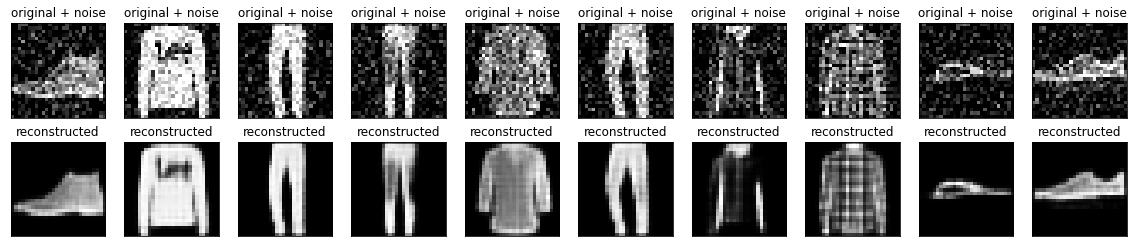

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

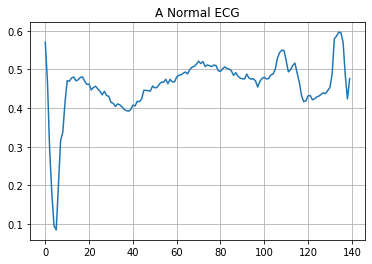

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

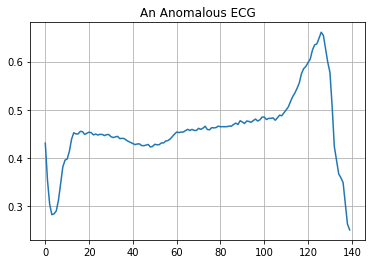

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0594

5/5 [==============================] - 0s 20ms/step - loss: 0.0582 - val_loss: 0.0534


Epoch 2/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0571

5/5 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.0519


Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0548

5/5 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 0.0508


Epoch 4/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0524

5/5 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.0491


Epoch 5/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0496

5/5 [==============================] - 0s 5ms/step - loss: 0.0482 - val_loss: 0.0467


Epoch 6/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0461

5/5 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.0449


Epoch 7/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0427

5/5 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0429


Epoch 8/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0391

5/5 [==============================] - 0s 5ms/step - loss: 0.0380 - val_loss: 0.0413


Epoch 9/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0361

5/5 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.0400


Epoch 10/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0324

5/5 [==============================] - 0s 5ms/step - loss: 0.0316 - val_loss: 0.0390


Epoch 11/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0298

5/5 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.0382


Epoch 12/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0286

5/5 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.0379


Epoch 13/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0270

5/5 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0370


Epoch 14/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0259

5/5 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0366


Epoch 15/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0242

5/5 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.0359


Epoch 16/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0228

5/5 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0355


Epoch 17/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0236

5/5 [==============================] - 0s 5ms/step - loss: 0.0231 - val_loss: 0.0352


Epoch 18/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0227

5/5 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0345


Epoch 19/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0219

5/5 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.0343


Epoch 20/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0211

5/5 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.0341


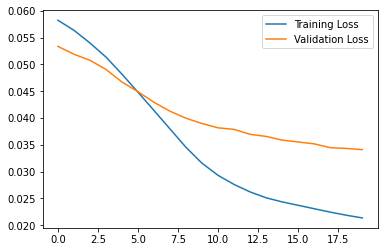

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

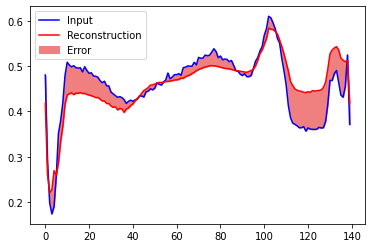

In [30]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

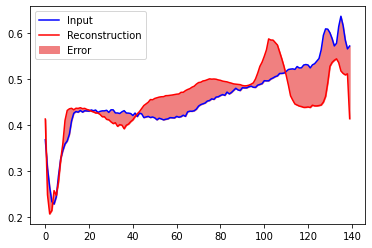

In [31]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

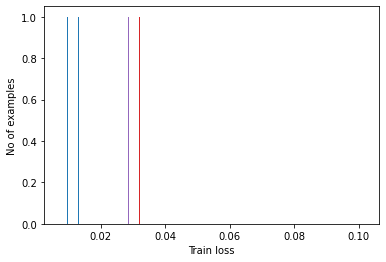

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033377893


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the recontruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

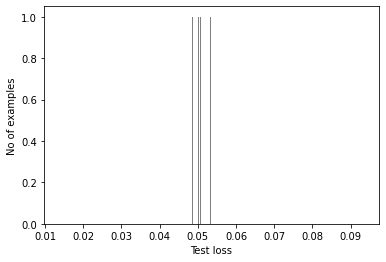

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571


## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
